<a href="https://colab.research.google.com/github/pascale25/2015lab5/blob/master/Value_Investor_stock_price_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Background:


We are a portfolio investment company and we make investments in the emerging markets around the world. Our company profits by investing in profitable companies, buying, holding and selling company stocks based on value investing principles.


Our goal is to establish a robust intelligent system to aid our value investing efforts using stock market data. We make investment decisions and based on intrinsic value of companies and do not trade on the basis of daily market volatility. Our profit realization strategy typically involves weekly, monthly and quarterly performance of stocks we buy or hold.


## Data Description:


You are given a set of portfolio companies trading data from emerging markets including 2020 Q1-Q2-Q3-Q4 2021 Q1 stock prices. Each company stock is provided in different sheets. Each market's operating days varies based on the country of the company and the market the stocks are exchanged. Use only 2020 data and predict with 2021 Q1 data.



**Goal(s):**


Predict stock price valuations on a daily, weekly and monthly basis. Recommend BUY, HOLD, SELL decisions. Maximize capital returns, minimize losses. Ideally a loss should never happen. Minimize HOLD period.


**Success Metrics:**


Evaluate on the basis of capital returns. Use Bollinger Bands to measure your systems effectiveness.


In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

## Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
## Display all rows and columns of a dataframe instead of a truncated version
from IPython.display import display
pd.set_option('display.max_columns', None) # replece None to 10 
pd.set_option('display.max_rows', None)

# Get the Data 

In [ ]:
import os
os.listdir("gdrive/MyDrive/Apziva_project/ idUyhPMVgVMlKK80")

['2020Q1Q2Q3Q4-2021Q1.gsheet',
 'data.gsheet',
 'data.xlsx',
 'dfrus.csv',
 'dfturk.csv',
 'dfdata.csv',
 'Text_Classif_LSTM.ipynb',
 'Copy of Microsoft Stock Forecasting with LSTMs.ipynb',
 'Copy of Value_Investor_stock_price.ipynb',
 'dffdata.csv',
 'important_link_forcasting.gdoc',
 'dffdata_clean.csv',
 'Value_Investor_stock_price_V2.ipynb']

In [ ]:
data_dir = "gdrive/MyDrive/Apziva_project/ idUyhPMVgVMlKK80/data.xlsx"
data_dir

'gdrive/MyDrive/Apziva_project/ idUyhPMVgVMlKK80/data.xlsx'

In [ ]:
xls = pd.ExcelFile(data_dir)

In [ ]:
xls.sheet_names

['Russia',
 'Turkey',
 'Egypt ',
 'Brazil ',
 'Argentina ',
 'Colombia',
 'South Africa',
 'South Korea']

In [ ]:
xls.sheet_names[0]

'Russia'

In [ ]:
dfrus = pd.read_excel(xls,xls.sheet_names[0]).dropna()
dfrus["Country"] = "Russia"
dfrus.head(5)
dfrus.tail(5)

Date   Price    Open    High     Low    Vol.  Change %  \
0  2021-03-31 00:00:00  291.02   294.0  294.42  290.26  47.00M   -0.0076   
1  2021-03-30 00:00:00  293.25  294.86  295.72   291.5  38.81M   -0.0002   
2  2021-03-29 00:00:00   293.3  289.72  294.09  289.26  43.68M    0.0071   
3  2021-03-26 00:00:00  291.22  288.63  292.75  288.32  56.07M    0.0159   
4  2021-03-25 00:00:00  286.66   286.5  287.03  283.85  35.22M    0.0030   

  Country  
0  Russia  
1  Russia  
2  Russia  
3  Russia  
4  Russia

Date   Price    Open    High     Low    Vol.  Change %  \
306  2020-01-10 00:00:00  258.19  257.86  259.25  256.88  18.85M    0.0008   
307  2020-01-09 00:00:00  257.99   259.4  261.76  257.01  38.33M   -0.0045   
308  2020-01-08 00:00:00  259.15  253.57  259.15  253.03  40.82M    0.0207   
309  2020-01-06 00:00:00   253.9  254.75  254.84   251.4  22.35M   -0.0043   
310  2020-01-03 00:00:00   255.0  255.99  258.19   253.7  35.85M    0.0010   

    Country  
306  Russia  
307  Russia  
308  Russia  
309  Russia  
310  Russia

In [ ]:
dfrus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 0 to 310
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      311 non-null    object 
 1   Price     311 non-null    object 
 2   Open      311 non-null    object 
 3   High      311 non-null    object 
 4   Low       311 non-null    object 
 5   Vol.      311 non-null    object 
 6   Change %  311 non-null    float64
 7   Country   311 non-null    object 
dtypes: float64(1), object(7)
memory usage: 21.9+ KB


In [ ]:
dfrus.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
Country     0
dtype: int64

In [ ]:
dfturk =  pd.read_excel(xls,xls.sheet_names[1]).dropna()
dfturk["Country"] = "Turkey"
dfturk.head(2)

Date  Price   Open   High    Low    Vol.  Change % Country
0  2021-03-31 00:00:00  19.41  19.42  19.63  19.27  13.14M   -0.0046  Turkey
1  2021-03-30 00:00:00   19.5  19.12  19.81  19.03  21.05M    0.0209  Turkey

In [ ]:
dfegy =  pd.read_excel(xls,xls.sheet_names[2]).dropna()
dfegy['Country'] = 'Egypt'
dfegy.head(2)

Date Price  Open  High   Low   Vol.  Change % Country
0  2021-03-31 00:00:00  3.75  3.74  3.82  3.71  1.57M    0.0054   Egypt
1  2021-03-30 00:00:00  3.73  3.71  3.76  3.67  3.43M    0.0081   Egypt

In [ ]:
dfbra =  pd.read_excel(xls,xls.sheet_names[3]).dropna()
dfbra["Country"]="Brazil"
dfbra.head(2)

Date  Price   Open   High    Low   Vol.  Change % Country
0  2021-03-31 00:00:00   10.2  10.35   10.4  10.12  7.77M   -0.0154  Brazil
1  2021-03-30 00:00:00  10.36  10.41  10.62   10.3  9.93M   -0.0105  Brazil

In [ ]:
dfarg =  pd.read_excel(xls,xls.sheet_names[4]).dropna()
dfarg['Country']='Argentina'
dfarg.head(2)

Date  Price   Open   High    Low     Vol.  Change %  \
0  2021-03-31 00:00:00  85.15   86.5   88.1  85.15  564.30K   -0.0110   
1  2021-03-30 00:00:00   86.1  85.15  86.75   84.6  141.40K    0.0129   

     Country  
0  Argentina  
1  Argentina

In [ ]:
dfcol =  pd.read_excel(xls,xls.sheet_names[5]).dropna()
dfcol['Country']='Colombia'
dfcol.head(2)

Date   Price    Open    High     Low     Vol.  Change %  \
0  2021-03-31 00:00:00  5150.0  5100.0  5170.0  5100.0  212.44K    0.0098   
1  2021-03-30 00:00:00  5100.0  5010.0  5100.0  5010.0  583.70K    0.0109   

    Country  
0  Colombia  
1  Colombia

In [ ]:
dfsaf =  pd.read_excel(xls,xls.sheet_names[6]).dropna()
dfsaf['Country'] = 'SouthAfrica'
dfsaf.head(2)

Date    Price     Open     High      Low   Vol.  Change %  \
0  2021-03-31 00:00:00  27373.0  26980.0  27526.0  26657.0  2.49M    0.0177   
1  2021-03-30 00:00:00  26898.0  26766.0  27443.0  26360.0  3.02M   -0.0030   

       Country  
0  SouthAfrica  
1  SouthAfrica

In [ ]:
dfsk =  pd.read_excel(xls,xls.sheet_names[7]).dropna()
dfsk['Country'] = 'SouthKorea'
dfsk.head(2)

Date    Price     Open     High      Low   Vol.  Change %  \
0  2021-03-31 00:00:00  13650.0  13700.0  13750.0  13450.0  0.19K    0.0000   
1  2021-03-30 00:00:00  13650.0  13850.0  14200.0  13050.0  3.17M    0.0074   

      Country  
0  SouthKorea  
1  SouthKorea

## save combined data to csv 

In [ ]:
#dfs = [dfrus, dfturk, dfcol, dfsaf, dfsk, dfegy, dfbra, dfarg ]
#len(dfs)

In [ ]:
#dff = pd.concat(dfs, axis= 0)

In [ ]:
#dff.to_csv('gdrive/MyDrive/Apziva_project/ idUyhPMVgVMlKK80/dffdata.csv')

# Load data and clean data 

In [ ]:
df = pd.read_csv("gdrive/MyDrive/Apziva_project/ idUyhPMVgVMlKK80/dffdata.csv", parse_dates = ['Date'], index_col = 'Date')

In [ ]:
df.drop(columns = 'Unnamed: 0', inplace = True)

In [ ]:
df.head(5)
df.tail(5)

Price    Open    High     Low    Vol.  Change % Country
Date                                                                
2021-03-31  291.02  294.00  294.42  290.26  47.00M   -0.0076  Russia
2021-03-30  293.25  294.86  295.72  291.50  38.81M   -0.0002  Russia
2021-03-29  293.30  289.72  294.09  289.26  43.68M    0.0071  Russia
2021-03-26  291.22  288.63  292.75  288.32  56.07M    0.0159  Russia
2021-03-25  286.66  286.50  287.03  283.85  35.22M    0.0030  Russia

Price   Open   High    Low     Vol.  Change %    Country
Date                                                                
2020-01-08  46.50  47.50  47.50  46.00    1.18M   -0.0231  Argentina
2020-01-07  47.60  48.35  49.00  46.90  901.95K   -0.0186  Argentina
2020-01-06  48.50  48.40  48.70  47.00  719.24K   -0.0061  Argentina
2020-01-03  48.80  48.25  49.45  46.50  595.36K    0.0114  Argentina
2020-01-02  48.25  49.35  50.20  47.55  878.50K   -0.0292  Argentina

In [ ]:
df.isnull().sum()

Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
Country     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2498 entries, 2021-03-31 to 2020-01-02
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     2498 non-null   float64
 1   Open      2498 non-null   float64
 2   High      2498 non-null   float64
 3   Low       2498 non-null   float64
 4   Vol.      2498 non-null   object 
 5   Change %  2498 non-null   float64
 6   Country   2498 non-null   object 
dtypes: float64(5), object(2)
memory usage: 156.1+ KB


In [ ]:
df.shape

(2498, 7)

In [ ]:
df['Country'].unique()

array(['Russia', 'Turkey', 'Colombia', 'SouthAfrica', 'SouthKorea',
       'Egypt', 'Brazil', 'Argentina'], dtype=object)

In [ ]:
df.columns

Index(['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %', 'Country'], dtype='object')

In [ ]:
#df.Price.unique()

In [ ]:
df['Vol.'].unique()

array(['47.00M', '38.81M', '43.68M', ..., '719.24K', '595.36K', '878.50K'],
      dtype=object)

In [ ]:
df[df['Vol.'] =='-'].head(10)

Price     Open     High      Low Vol.  Change %     Country
Date                                                                     
2021-03-28  12200.0  12200.0  12200.0  12200.0    -       0.0  SouthKorea
2021-03-21  10950.0  10950.0  10950.0  10950.0    -       0.0  SouthKorea
2021-03-14  10350.0  10350.0  10350.0  10350.0    -       0.0  SouthKorea
2021-03-07   9820.0   9820.0   9820.0   9820.0    -       0.0  SouthKorea
2021-03-01   8990.0   8990.0   8990.0   8990.0    -       0.0  SouthKorea
2021-02-21   8460.0   8460.0   8460.0   8460.0    -       0.0  SouthKorea
2021-01-31   7750.0   7750.0   7750.0   7750.0    -       0.0  SouthKorea
2021-01-17   8850.0   8850.0   8850.0   8850.0    -       0.0  SouthKorea
2021-01-10   9270.0   9270.0   9270.0   9270.0    -       0.0  SouthKorea
2020-12-27   7790.0   7790.0   7790.0   7790.0    -       0.0  SouthKorea

In [ ]:
# Define a function to clean and convert values
def clean_values(val):
    if "K" in val:
        return float(val.replace("K", "")) * 1000
    elif "M" in val:
        return float(val.replace("M", "")) * 1000000
    else:
        return  0 #float(val) (to replace '-' with 0)

# Create a pandas DataFrame with sample data
dfw = pd.DataFrame({
    "Values": ['47.00M', '38.81M', '43.68M', '719.24K', '595.36K', '878.50K']
})
print(dfw)
# Apply the clean_values function to the "Values" column of the DataFrame
dfw["Cleaned Values"] = dfw["Values"].apply(clean_values)

# Print the resulting DataFrame
print(dfw)

    Values
0   47.00M
1   38.81M
2   43.68M
3  719.24K
4  595.36K
5  878.50K
    Values  Cleaned Values
0   47.00M      47000000.0
1   38.81M      38810000.0
2   43.68M      43680000.0
3  719.24K        719240.0
4  595.36K        595360.0
5  878.50K        878500.0


In [ ]:
df['volume'] = df["Vol."].apply(clean_values)

In [ ]:
df.drop(columns = 'Vol.', inplace = True)

In [ ]:
df.head(3)

Price    Open    High     Low  Change % Country      volume
Date                                                                    
2021-03-31  291.02  294.00  294.42  290.26   -0.0076  Russia  47000000.0
2021-03-30  293.25  294.86  295.72  291.50   -0.0002  Russia  38810000.0
2021-03-29  293.30  289.72  294.09  289.26    0.0071  Russia  43680000.0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2498 entries, 2021-03-31 to 2020-01-02
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     2498 non-null   float64
 1   Open      2498 non-null   float64
 2   High      2498 non-null   float64
 3   Low       2498 non-null   float64
 4   Change %  2498 non-null   float64
 5   Country   2498 non-null   object 
 6   volume    2498 non-null   float64
dtypes: float64(6), object(1)
memory usage: 156.1+ KB


In [ ]:
df.index

DatetimeIndex(['2021-03-31', '2021-03-30', '2021-03-29', '2021-03-26',
               '2021-03-25', '2021-03-24', '2021-03-23', '2021-03-22',
               '2021-03-19', '2021-03-18',
               ...
               '2020-01-15', '2020-01-14', '2020-01-13', '2020-01-10',
               '2020-01-09', '2020-01-08', '2020-01-07', '2020-01-06',
               '2020-01-03', '2020-01-02'],
              dtype='datetime64[ns]', name='Date', length=2498, freq=None)

In [ ]:
#df['Date'].min()
#df['Date'].max()
#df['Date'].max() - df['Date'].min()

# Save and load clean data -------- EDA

In [ ]:
# save clean data 
#df.to_csv('gdrive/MyDrive/Apziva_project/ idUyhPMVgVMlKK80/dffdata_clean.csv')

In [ ]:
df = pd.read_csv("gdrive/MyDrive/Apziva_project/ idUyhPMVgVMlKK80/dffdata_clean.csv", parse_dates = ['Date'], index_col = 'Date')

In [ ]:
df.head()

Price    Open    High     Low  Change % Country      volume
Date                                                                    
2021-03-31  291.02  294.00  294.42  290.26   -0.0076  Russia  47000000.0
2021-03-30  293.25  294.86  295.72  291.50   -0.0002  Russia  38810000.0
2021-03-29  293.30  289.72  294.09  289.26    0.0071  Russia  43680000.0
2021-03-26  291.22  288.63  292.75  288.32    0.0159  Russia  56070000.0
2021-03-25  286.66  286.50  287.03  283.85    0.0030  Russia  35220000.0

In [ ]:
df.Country.unique()

array(['Russia', 'Turkey', 'Colombia', 'SouthAfrica', 'SouthKorea',
       'Egypt', 'Brazil', 'Argentina'], dtype=object)

In [ ]:
for x in df.Country.unique():
  print("------------------------the country is -------------------------------------" , x)
  print(df[df['Country']== x].describe())

------------------------the country is ------------------------------------- Russia
            Price        Open        High         Low    Change %  \
count  311.000000  311.000000  311.000000  311.000000  311.000000   
mean   234.524019  234.417846  237.314759  231.366141    0.000668   
std     32.079847   32.058167   32.075624   32.076603    0.021931   
min    174.270000  175.000000  182.200000  172.150000   -0.095700   
25%    207.700000  207.215000  209.660000  204.475000   -0.010100   
50%    229.140000  229.080000  231.950000  226.860000    0.000400   
75%    264.380000  263.885000  267.255000  261.110000    0.012950   
max    293.300000  294.860000  296.070000  291.500000    0.129000   

             volume  
count  3.110000e+02  
mean   7.305698e+07  
std    3.805809e+07  
min    8.760000e+06  
25%    4.767000e+07  
50%    6.626000e+07  
75%    8.512000e+07  
max    2.630400e+08  
------------------------the country is ------------------------------------- Turkey
            

In [ ]:
df.columns

Index(['Price', 'Open', 'High', 'Low', 'Change %', 'Country', 'volume'], dtype='object')

In [ ]:
sns.pairplot(df.reset_index(), hue="Country", corner=False)

# 1. EDA Compare daily, weekly and monthly stock price trends

In [ ]:
# define new dataframe
co = df[['Price', 'Country']].copy()
co.head(2)

Price Country
Date                      
2021-03-31  291.02  Russia
2021-03-30  293.25  Russia

In [ ]:
co.shape

(2498, 2)

In [ ]:
co.isna().sum()

Price      0
Country    0
dtype: int64

In [ ]:
co = co.pivot(columns='Country', values= 'Price')
co.head()

Country     Argentina  Brazil  Colombia  Egypt  Russia  SouthAfrica  \
Date                                                                  
2020-01-02      48.25   12.57    7120.0   4.81     NaN      14330.0   
2020-01-03      48.80   12.90    7000.0    NaN   255.0      14843.0   
2020-01-05        NaN     NaN       NaN   4.41     NaN          NaN   
2020-01-06      48.50   12.89       NaN   4.28   253.9      14620.0   
2020-01-07      47.60   13.48    6950.0    NaN     NaN      14500.0   

Country     SouthKorea  Turkey  
Date                            
2020-01-02      5850.0   20.38  
2020-01-03      5900.0   20.30  
2020-01-05         NaN     NaN  
2020-01-06      5730.0   20.08  
2020-01-07      5690.0   19.93

In [ ]:
print(co.columns)
print(co.shape)

Index(['Argentina', 'Brazil', 'Colombia', 'Egypt', 'Russia', 'SouthAfrica',
       'SouthKorea', 'Turkey'],
      dtype='object', name='Country')
(387, 8)


In [ ]:
co.index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-05', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-12', '2020-01-13',
               ...
               '2021-03-21', '2021-03-22', '2021-03-23', '2021-03-24',
               '2021-03-25', '2021-03-26', '2021-03-28', '2021-03-29',
               '2021-03-30', '2021-03-31'],
              dtype='datetime64[ns]', name='Date', length=387, freq=None)

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = co)

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='Date'>

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = co[['SouthAfrica','SouthKorea','Colombia']])

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='Date'>

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='Date'>

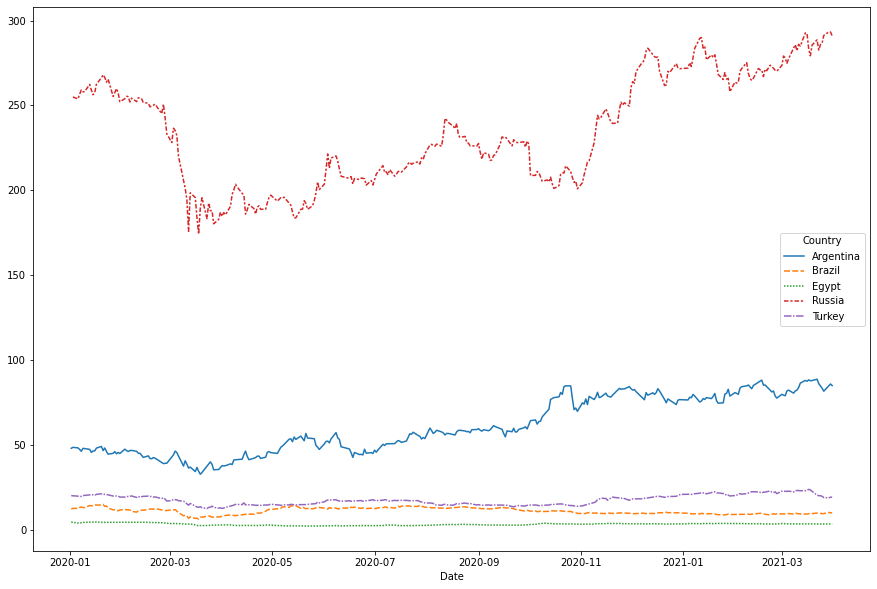

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = co[['Argentina', 'Brazil', 'Egypt', 'Russia', 'Turkey']]) # SouthAfrica','SouthKorea','Colombia'

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='Date'>

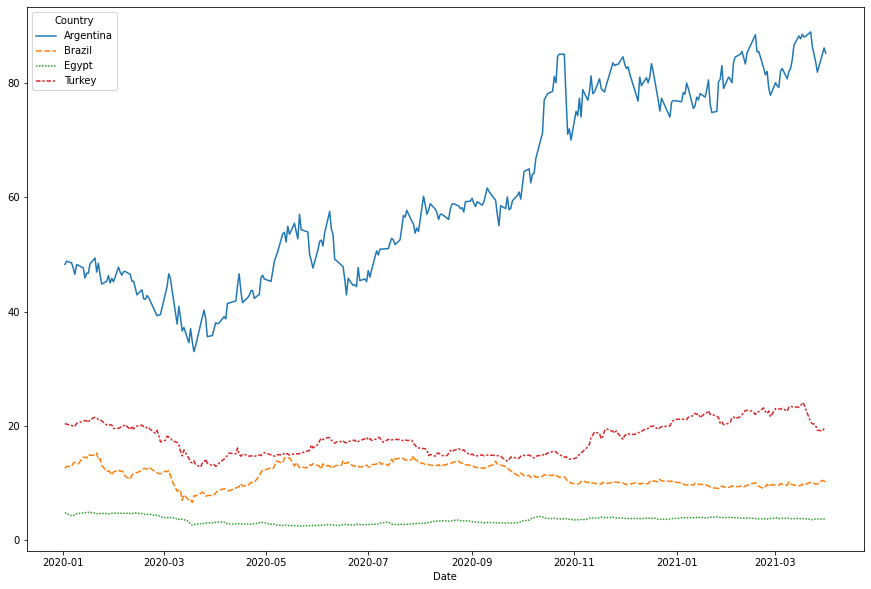

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = co[['Argentina', 'Brazil', 'Egypt', 'Turkey']]) # SouthAfrica','SouthKorea','Colombia','Russia',

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='Date'>

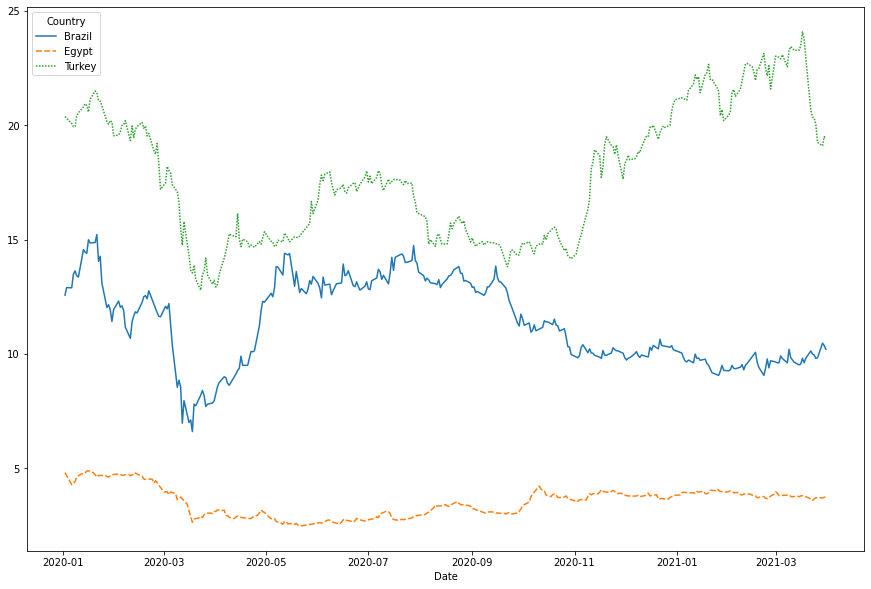

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = co[[ 'Brazil', 'Egypt', 'Turkey']]) # SouthAfrica','SouthKorea','Colombia','Russia','Argentina',

<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='Country', ylabel='Country'>

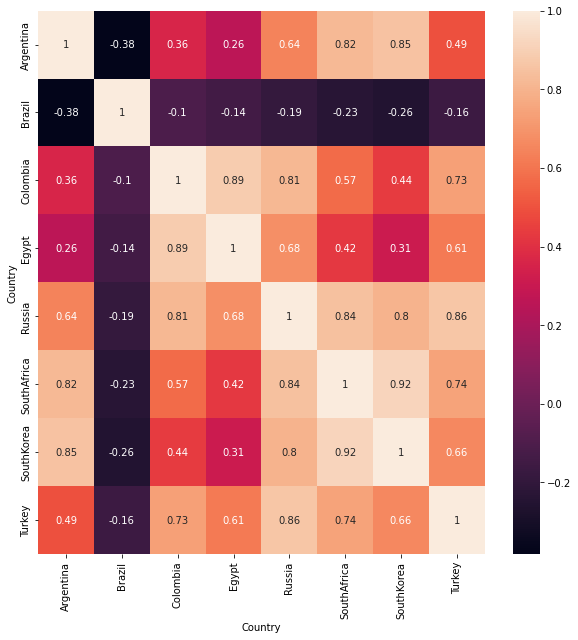

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(co.corr(), annot=True)

In [ ]:
# compute the average of each week by aggregating the daily data into weekly periods.
#resamples the entire DataFrame to a lower frequency of one week ('W' stands for weekly), taking the mean of each week.
cow = co.resample(rule ='W').mean()
cow.head(2)
cow.shape

Country     Argentina  Brazil  Colombia   Egypt    Russia  SouthAfrica  \
Date                                                                     
2020-01-05     48.525  12.735    7060.0  4.6100  255.0000      14586.5   
2020-01-12     47.780  13.356    6852.5  4.5175  257.3075      14871.0   

Country     SouthKorea  Turkey  
Date                            
2020-01-05      5875.0  20.340  
2020-01-12      5568.0  20.182

(66, 8)

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='Date'>

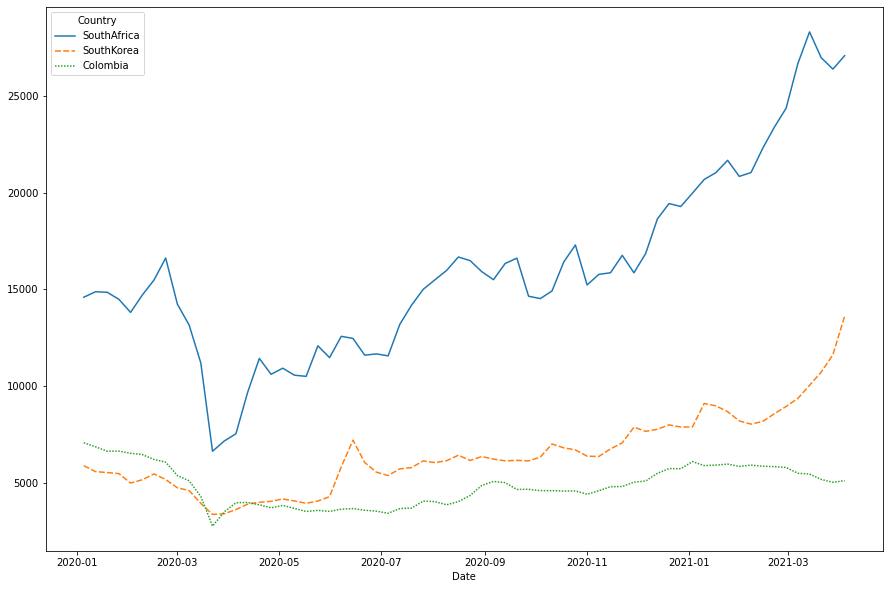

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = cow[['SouthAfrica','SouthKorea','Colombia']])

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='Date'>

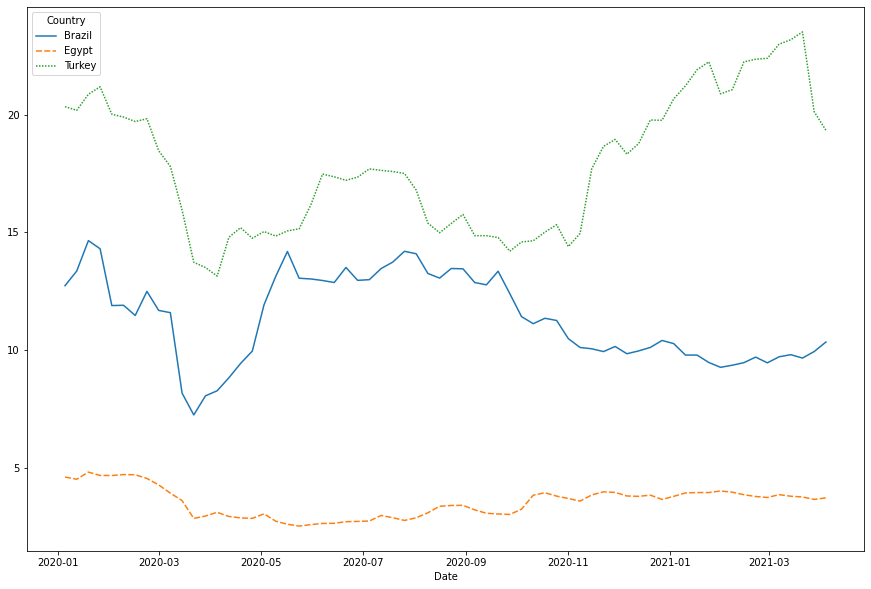

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = cow[[ 'Brazil', 'Egypt', 'Turkey']]) # SouthAfrica','SouthKorea','Colombia','Russia','Argentina',

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='Date'>

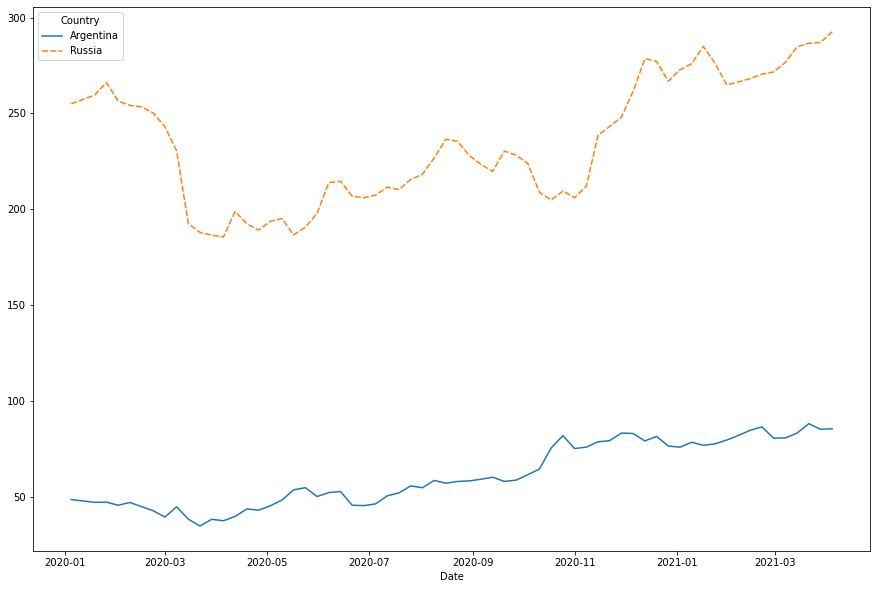

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = cow[['Argentina', 'Russia']]) # SouthAfrica','SouthKorea','Colombia'

In [ ]:
# compute the average of each month by aggregating the daily data into monthly periods.
com = co.resample(rule ='M').mean()
com.head(2)
com.shape

Country     Argentina     Brazil     Colombia   Egypt      Russia  \
Date                                                                
2020-01-31  47.029545  13.475909  6683.333333  4.6710  259.728500   
2020-02-29  43.922222  11.911667  6017.000000  4.6015  250.596842   

Country      SouthAfrica   SouthKorea     Turkey  
Date                                              
2020-01-31  14508.090909  5446.750000  20.540455  
2020-02-29  15255.450000  5120.952381  19.474000

(15, 8)

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(data=com)

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='Date'>

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='Date', ylabel='Price'>

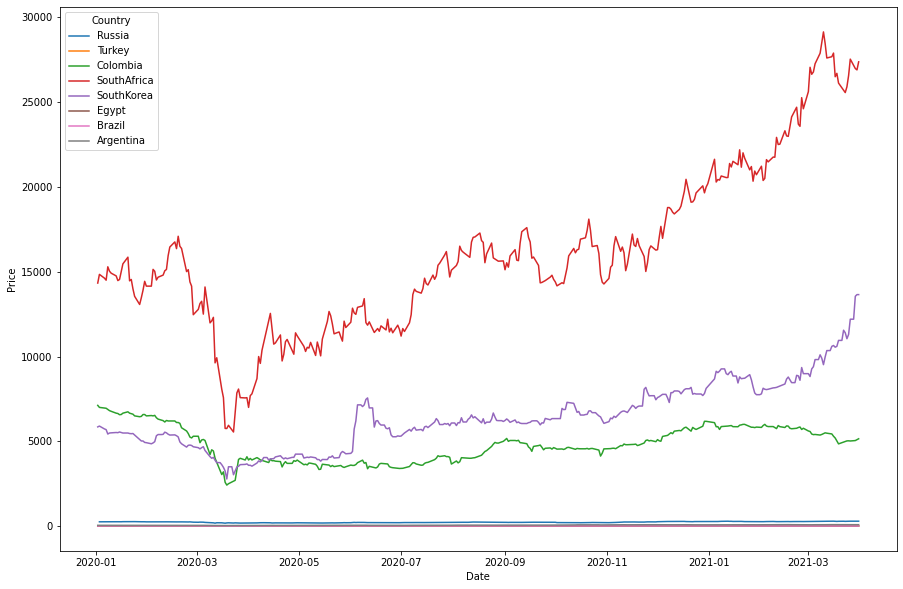

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(data=df.reset_index(), x=df.reset_index()['Date'], y= 'Price', hue="Country")

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(data=df.reset_index(), x=df.reset_index()['Date'], y= 'Open', hue="Country")

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='Date', ylabel='Open'>

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='Date', ylabel='High'>

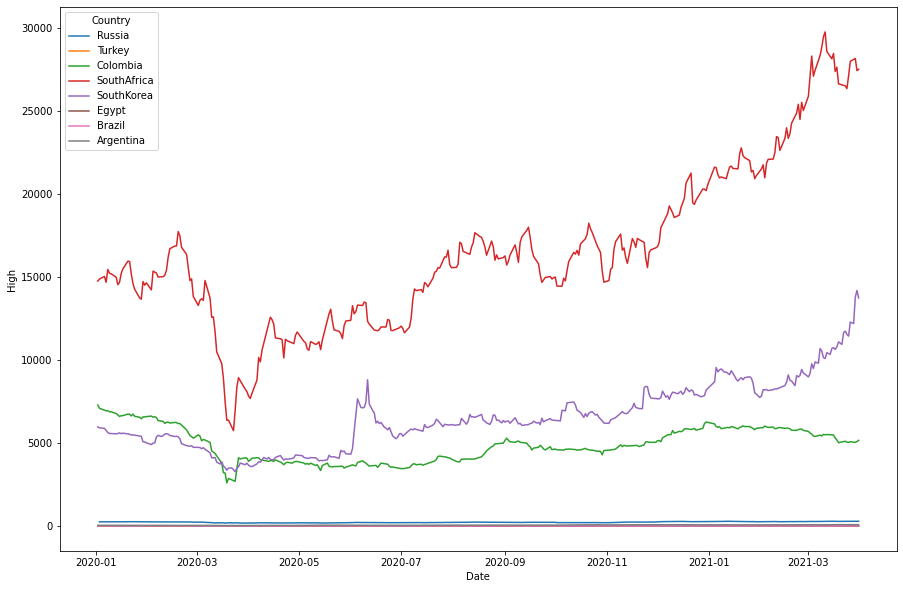

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(data=df.reset_index(), x=df.reset_index()['Date'], y= 'High', hue="Country")

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='Date', ylabel='Low'>

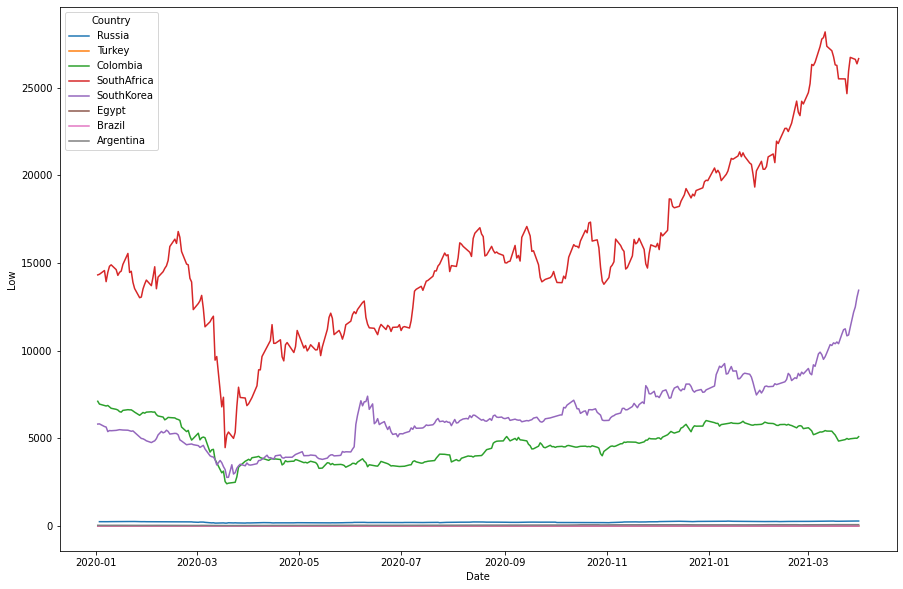

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(data=df.reset_index(), x=df.reset_index()['Date'], y= 'Low', hue="Country")

In [ ]:
df.columns

Index(['Price', 'Open', 'High', 'Low', 'Change %', 'Country', 'volume'], dtype='object')

## Compare the performance of several asset classes

you can easily compare several time series by normalizing their starting points to 100, and plot the result.

In [ ]:
co.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 387 entries, 2020-01-02 to 2021-03-31
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Argentina    300 non-null    float64
 1   Brazil       309 non-null    float64
 2   Colombia     303 non-null    float64
 3   Egypt        305 non-null    float64
 4   Russia       311 non-null    float64
 5   SouthAfrica  314 non-null    float64
 6   SouthKorea   341 non-null    float64
 7   Turkey       315 non-null    float64
dtypes: float64(8)
memory usage: 27.2 KB


In [ ]:
# Select first prices
first_prices = co.iloc[0]
first_prices

Country
Argentina         48.25
Brazil            12.57
Colombia        7120.00
Egypt              4.81
Russia              NaN
SouthAfrica    14330.00
SouthKorea      5850.00
Turkey            20.38
Name: 2020-01-02 00:00:00, dtype: float64

In [ ]:
# Create normalized
normalized = co.div(first_prices).mul(100)
normalized.head(3)

Country      Argentina      Brazil    Colombia       Egypt  Russia  \
Date                                                                 
2020-01-02  100.000000  100.000000  100.000000  100.000000     NaN   
2020-01-03  101.139896  102.625298   98.314607         NaN     NaN   
2020-01-05         NaN         NaN         NaN   91.683992     NaN   

Country     SouthAfrica  SouthKorea      Turkey  
Date                                             
2020-01-02   100.000000  100.000000  100.000000  
2020-01-03   103.579902  100.854701   99.607458  
2020-01-05          NaN         NaN         NaN

In [ ]:
# Plot normalized
normalized.plot()
plt.show()

<AxesSubplot:xlabel='Date'>

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = normalized)

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='Date'>

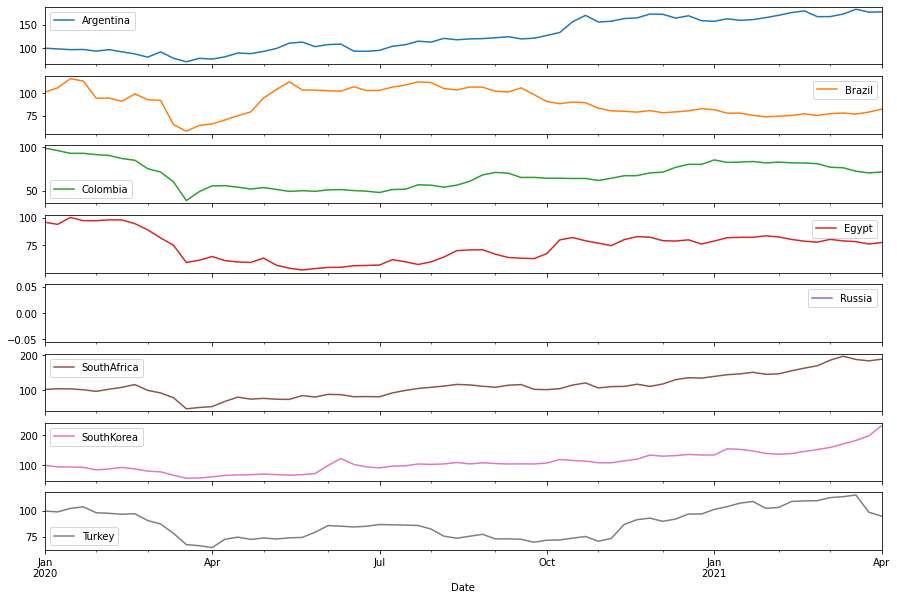

In [ ]:
weekly_average = normalized.resample('W').mean()
weekly_average.plot(subplots=True, figsize = (15, 10));
plt.show();

# Get retruns for stock price series

In the context of stock prices, return refers to the percentage change in the price of a stock over a given time period. 

It measures how much money an investor has gained or lost on their investment in that stock during the period.

The formula for calculating the return is:

Return = (Current Price - Initial Price) / Initial Price * 100%

where:

Current Price: the price of the stock at the end of the time period
Initial Price: the price of the stock at the beginning of the time period
For example, suppose an investor bought a stock for $50 and sold it for $60 after one year. The return on the investment would be:

Return = ($60 - $50) / $50 * 100% = 20%

This means that the investor gained a 20% return on their investment over the one-year period.

In general, the return on a stock can be positive, negative, or zero, depending on whether the price increased, decreased, or stayed the same over the time period. Investors use returns to measure the performance of their investments and compare them to other investment opportunities.

In [ ]:
#df['lagged']=df.Price.shift(periods = -1) # the lagged version (in past)
df['shifted']=df.Price.shift() # default 1
df.head(3)

Price    Open    High     Low  Change % Country      volume  \
Date                                                                       
2021-03-31  291.02  294.00  294.42  290.26   -0.0076  Russia  47000000.0   
2021-03-30  293.25  294.86  295.72  291.50   -0.0002  Russia  38810000.0   
2021-03-29  293.30  289.72  294.09  289.26    0.0071  Russia  43680000.0   

            shifted  
Date                 
2021-03-31      NaN  
2021-03-30   291.02  
2021-03-29   293.25

In [ ]:
# calculate one period percent change
df['change'] = df.Price.div(df.shifted)
df[['Price', 'shifted', 'change']].head()

Price  shifted    change
Date                                 
2021-03-31  291.02      NaN       NaN
2021-03-30  293.25   291.02  1.007663
2021-03-29  293.30   293.25  1.000171
2021-03-26  291.22   293.30  0.992908
2021-03-25  286.66   291.22  0.984342

In [ ]:
# relative change in percentage return 
df['return']= df.change.sub(1).mul(100)
df[['Price', 'shifted', 'change', 'return']].head()

Price  shifted    change    return
Date                                           
2021-03-31  291.02      NaN       NaN       NaN
2021-03-30  293.25   291.02  1.007663  0.766270
2021-03-29  293.30   293.25  1.000171  0.017050
2021-03-26  291.22   293.30  0.992908 -0.709171
2021-03-25  286.66   291.22  0.984342 -1.565827

In [ ]:
# anaother to get the percentage change return (periode of 3)
df['pct_return_3d'] = df.Price.pct_change(periods= 1).mul(100)
df[['Price', 'shifted', 'change', 'return', 'pct_return_3d']].head()

Price  shifted    change    return  pct_return_3d
Date                                                          
2021-03-31  291.02      NaN       NaN       NaN            NaN
2021-03-30  293.25   291.02  1.007663  0.766270       0.766270
2021-03-29  293.30   293.25  1.000171  0.017050       0.017050
2021-03-26  291.22   293.30  0.992908 -0.709171      -0.709171
2021-03-25  286.66   291.22  0.984342 -1.565827      -1.565827

In [ ]:
#Use .asfreq() to set the frequency of google to business daily.
#dftry = dftry.asfreq('B')

In [ ]:
 #resample the stock index to quarter start frequency using the alias 'QS', and aggregating using the .first() observations.
# Calculate df quarterly returns here 
#df_quarterly = df.resample('QS').first()
#df_quarterly_return =df_quarterly.pct_change().mul(100)

# EDA     Compare Return (daily , weekly and monthly)

In [ ]:
re = df[['Price', 'Country']].copy()
re.head(2)

Price Country
Date                      
2021-03-31  291.02  Russia
2021-03-30  293.25  Russia

In [ ]:
re = re.pivot(columns='Country', values= 'Price')
re.head()

Country     Argentina  Brazil  Colombia  Egypt  Russia  SouthAfrica  \
Date                                                                  
2020-01-02      48.25   12.57    7120.0   4.81     NaN      14330.0   
2020-01-03      48.80   12.90    7000.0    NaN   255.0      14843.0   
2020-01-05        NaN     NaN       NaN   4.41     NaN          NaN   
2020-01-06      48.50   12.89       NaN   4.28   253.9      14620.0   
2020-01-07      47.60   13.48    6950.0    NaN     NaN      14500.0   

Country     SouthKorea  Turkey  
Date                            
2020-01-02      5850.0   20.38  
2020-01-03      5900.0   20.30  
2020-01-05         NaN     NaN  
2020-01-06      5730.0   20.08  
2020-01-07      5690.0   19.93

In [ ]:
re.isnull().sum()

Country
Argentina      87
Brazil         78
Colombia       84
Egypt          82
Russia         76
SouthAfrica    73
SouthKorea     46
Turkey         72
dtype: int64

In [ ]:
# repalce missing value wiht bacck fill 
re.bfill(inplace=True)

In [ ]:
re.isnull().sum()

Country
Argentina      0
Brazil         0
Colombia       0
Egypt          0
Russia         0
SouthAfrica    0
SouthKorea     0
Turkey         0
dtype: int64

In [ ]:
re.columns

Index(['Argentina', 'Brazil', 'Colombia', 'Egypt', 'Russia', 'SouthAfrica',
       'SouthKorea', 'Turkey'],
      dtype='object', name='Country')

In [ ]:
for col in re.columns:
  # Create daily_return
  re[col+'_d'] = re[col].pct_change(periods=1).mul(100)
    # Create weekly_return
  re[col+'_w'] = re[col].pct_change(periods=7).mul(100)
  # Create monthly_return
  re[col+'_m'] = re[col].pct_change(periods=30).mul(100)
  # Create annual_return
  re[col+'_a'] = re[col].pct_change(periods=360).mul(100)
re.head(2)

Country     Argentina  Brazil  Colombia  Egypt  Russia  SouthAfrica  \
Date                                                                  
2020-01-02      48.25   12.57    7120.0   4.81   255.0      14330.0   
2020-01-03      48.80   12.90    7000.0   4.41   255.0      14843.0   

Country     SouthKorea  Turkey  Argentina_d  Argentina_w  Argentina_m  \
Date                                                                    
2020-01-02      5850.0   20.38          NaN          NaN          NaN   
2020-01-03      5900.0   20.30     1.139896          NaN          NaN   

Country     Argentina_a  Brazil_d  Brazil_w  Brazil_m  Brazil_a  Colombia_d  \
Date                                                                          
2020-01-02          NaN       NaN       NaN       NaN       NaN         NaN   
2020-01-03          NaN  2.625298       NaN       NaN       NaN   -1.685393   

Country     Colombia_w  Colombia_m  Colombia_a   Egypt_d  Egypt_w  Egypt_m  \
Date                                                                         
2020-01-02         NaN         NaN         NaN       NaN      NaN      NaN   
2020-01-03         NaN         NaN         NaN -8.316008      NaN      NaN   

Country     Egypt_a  Russia_d  Russia_w  Russia_m  Russia_a  SouthAfrica_d  \
Date                                                                         
2020-01-02      NaN       NaN       NaN       NaN       NaN            NaN   
2020-01-03      NaN       0.0       NaN       NaN       NaN       3.579902   

Country     SouthAfrica_w  SouthAfrica_m  SouthAfrica_a  SouthKorea_d  \
Date                                                                    
2020-01-02            NaN            NaN            NaN           NaN   
2020-01-03            NaN            NaN            NaN      0.854701   

Country     SouthKorea_w  SouthKorea_m  SouthKorea_a  Turkey_d  Turkey_w  \
Date                                                                       
2020-01-02           NaN           NaN           NaN       NaN       NaN   
2020-01-03           NaN           NaN           NaN -0.392542       NaN   

Country     Turkey_m  Turkey_a  
Date                            
2020-01-02       NaN       NaN  
2020-01-03       NaN       NaN

In [ ]:
re.isna().sum()

Country
Argentina          0
Brazil             0
Colombia           0
Egypt              0
Russia             0
SouthAfrica        0
SouthKorea         0
Turkey             0
Argentina_d        1
Argentina_w        7
Argentina_m       30
Argentina_a      360
Brazil_d           1
Brazil_w           7
Brazil_m          30
Brazil_a         360
Colombia_d         1
Colombia_w         7
Colombia_m        30
Colombia_a       360
Egypt_d            1
Egypt_w            7
Egypt_m           30
Egypt_a          360
Russia_d           1
Russia_w           7
Russia_m          30
Russia_a         360
SouthAfrica_d      1
SouthAfrica_w      7
SouthAfrica_m     30
SouthAfrica_a    360
SouthKorea_d       1
SouthKorea_w       7
SouthKorea_m      30
SouthKorea_a     360
Turkey_d           1
Turkey_w           7
Turkey_m          30
Turkey_a         360
dtype: int64

In [ ]:
re.columns

Index(['Argentina', 'Brazil', 'Colombia', 'Egypt', 'Russia', 'SouthAfrica',
       'SouthKorea', 'Turkey', 'Argentina_d', 'Argentina_w', 'Argentina_m',
       'Argentina_a', 'Brazil_d', 'Brazil_w', 'Brazil_m', 'Brazil_a',
       'Colombia_d', 'Colombia_w', 'Colombia_m', 'Colombia_a', 'Egypt_d',
       'Egypt_w', 'Egypt_m', 'Egypt_a', 'Russia_d', 'Russia_w', 'Russia_m',
       'Russia_a', 'SouthAfrica_d', 'SouthAfrica_w', 'SouthAfrica_m',
       'SouthAfrica_a', 'SouthKorea_d', 'SouthKorea_w', 'SouthKorea_m',
       'SouthKorea_a', 'Turkey_d', 'Turkey_w', 'Turkey_m', 'Turkey_a'],
      dtype='object', name='Country')

In [ ]:
re[['Argentina_m', 'Brazil_m', 'Egypt_m', 'Russia_m', 'Turkey_m', 'SouthAfrica_m','SouthKorea_m','Colombia_m']].isna().sum()

Country
Argentina_m      30
Brazil_m         30
Egypt_m          30
Russia_m         30
Turkey_m         30
SouthAfrica_m    30
SouthKorea_m     30
Colombia_m       30
dtype: int64

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = re[['Argentina_m', 'Brazil_m', 'Egypt_m', 'Russia_m', 'Turkey_m', 'SouthAfrica_m','SouthKorea_m','Colombia_m']].dropna()) # SouthAfrica','SouthKorea','Colombia'

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='Date'>

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='Date'>

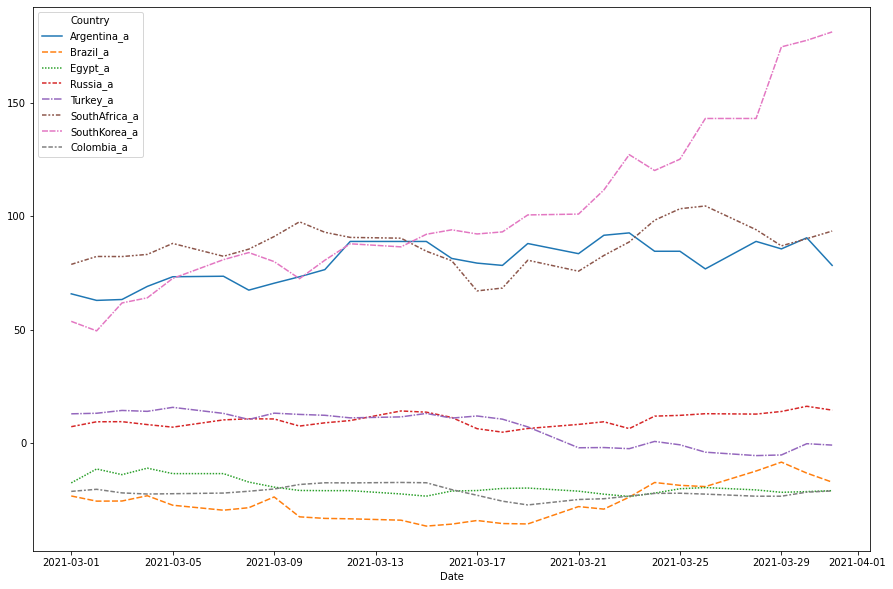

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = re[['Argentina_a', 'Brazil_a', 'Egypt_a', 'Russia_a', 'Turkey_a', 'SouthAfrica_a','SouthKorea_a','Colombia_a']].dropna()) # SouthAfrica','SouthKorea','Colombia'

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='Date'>

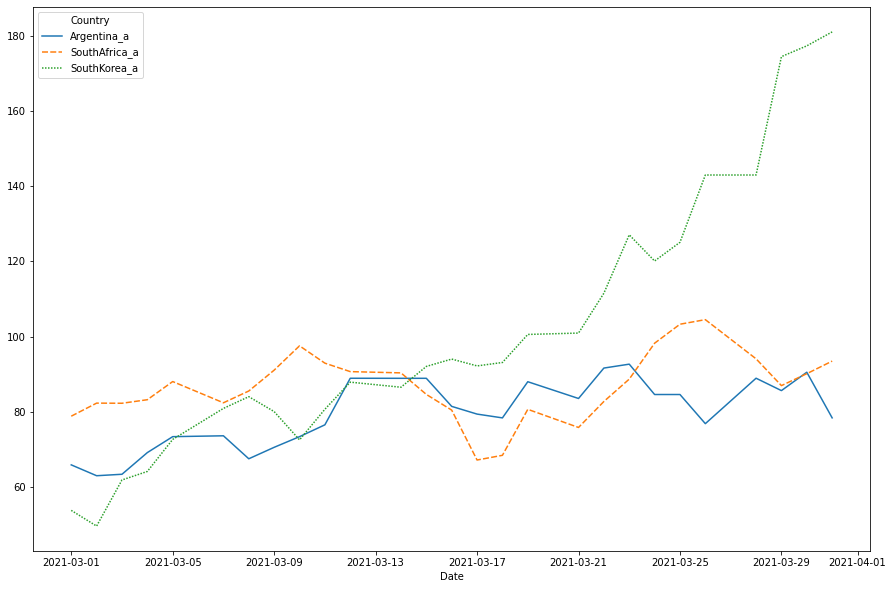

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = re[['Argentina_a', 'SouthAfrica_a','SouthKorea_a']].dropna()) # SouthAfrica','SouthKorea','Colombia'

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = re[['Argentina_m', 'SouthAfrica_m','SouthKorea_m']].dropna()) # SouthAfrica','SouthKorea','Colombia'

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='Date'>

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='Date'>

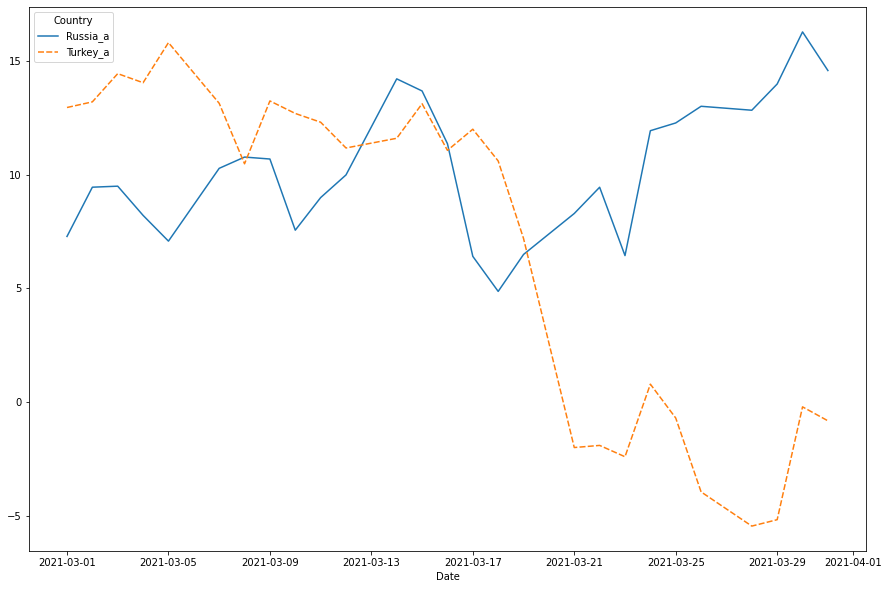

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = re[['Russia_a', 'Turkey_a']].dropna()) # SouthAfrica','SouthKorea','Colombia'

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = re[['Russia_m', 'Turkey_m']].dropna()) # SouthAfrica','SouthKorea','Colombia'

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='Date'>

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='Date'>

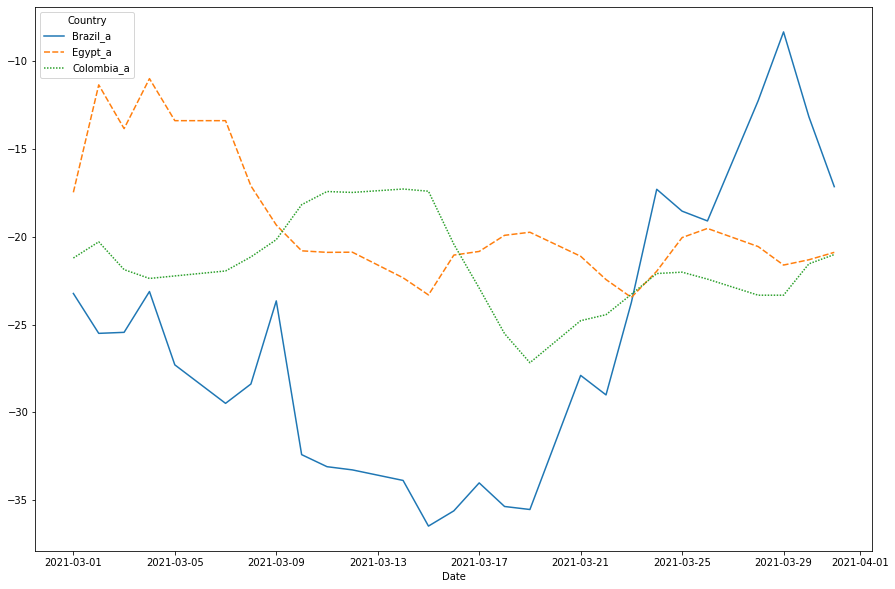

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = re[['Brazil_a', 'Egypt_a' ,'Colombia_a']].dropna()) # SouthAfrica','SouthKorea','Colombia'

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = re[['Brazil_m', 'Egypt_m' ,'Colombia_m']].dropna()) # SouthAfrica','SouthKorea','Colombia'

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='Date'>

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = re[['Argentina_a', 'Russia_a']].dropna()) # SouthAfrica','SouthKorea','Colombia'

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='Date'>

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='Date'>

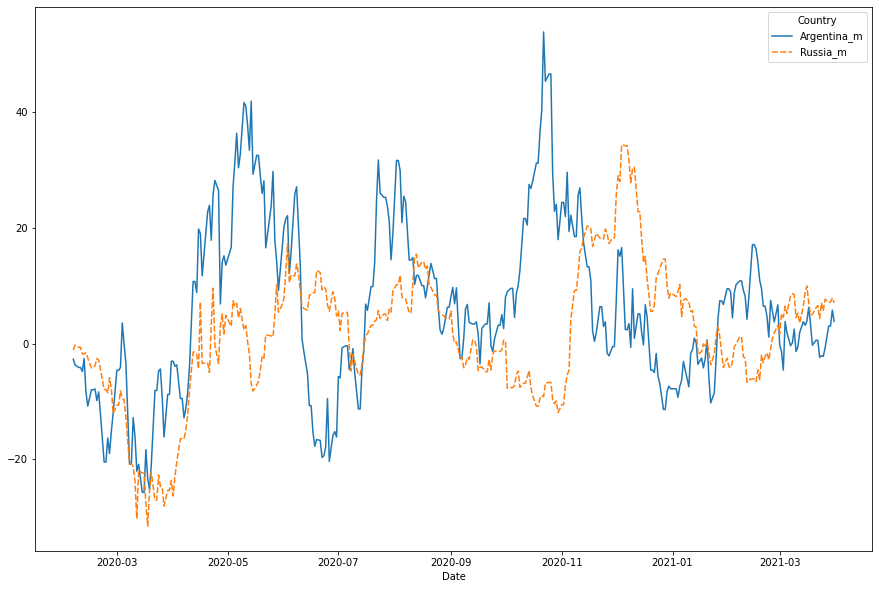

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = re[['Argentina_m', 'Russia_m']]) # SouthAfrica','SouthKorea','Colombia'

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='Date'>

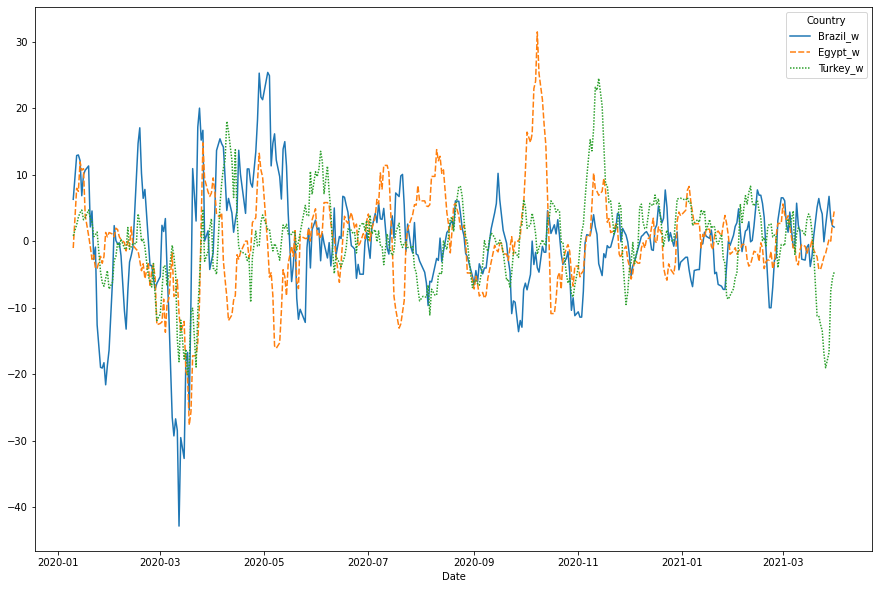

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = re[[ 'Brazil_w', 'Egypt_w', 'Turkey_w']]) # SouthAfrica','SouthKorea','Colombia','Russia','Argentina',

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = re[['SouthAfrica_w','SouthKorea_w','Colombia_w']])

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='Date'>

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='Country', ylabel='Country'>

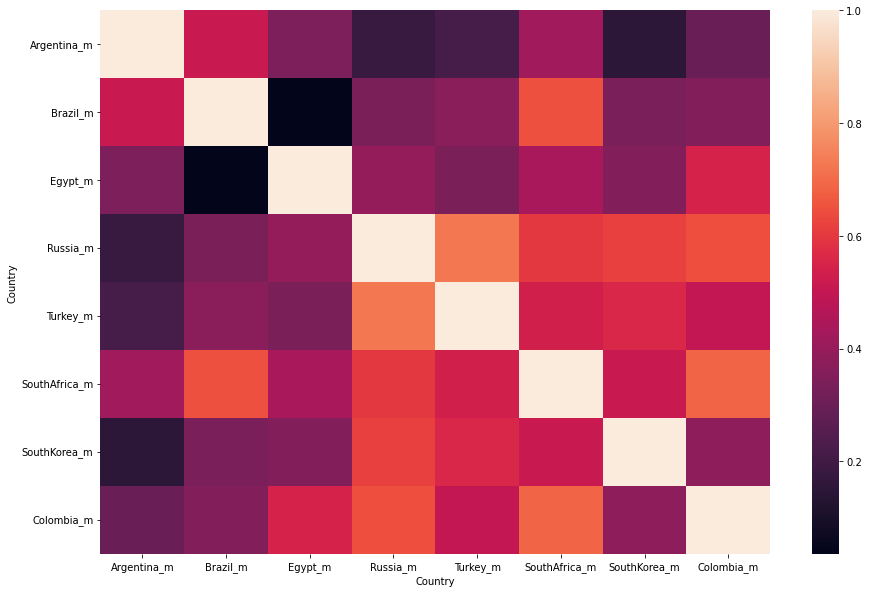

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(data = re[['Argentina_m', 'Brazil_m', 'Egypt_m', 'Russia_m', 'Turkey_m', 'SouthAfrica_m','SouthKorea_m','Colombia_m']].corr())

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='Country', ylabel='Country'>

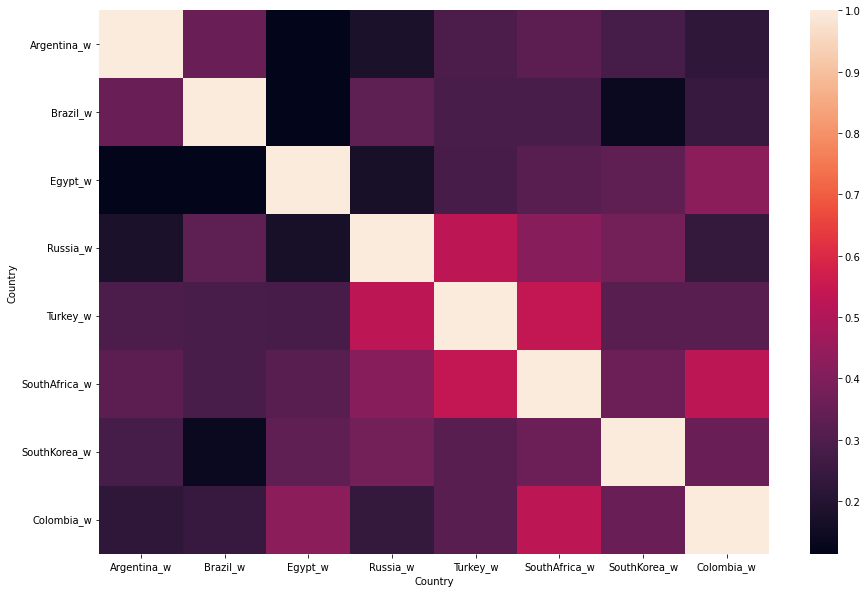

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(data = re[['Argentina_w', 'Brazil_w', 'Egypt_w', 'Russia_w', 'Turkey_w', 'SouthAfrica_w','SouthKorea_w','Colombia_w']].corr())

# EDA Price Open High Low in each Country




In [ ]:
# convert daily data to weekly data 
#df.resample(rule="W").last()

In [ ]:
df.head(2)

Price    Open    High     Low  Change % Country      volume  \
Date                                                                       
2021-03-31  291.02  294.00  294.42  290.26   -0.0076  Russia  47000000.0   
2021-03-30  293.25  294.86  295.72  291.50   -0.0002  Russia  38810000.0   

            shifted    change   return  pct_return_3d  
Date                                                   
2021-03-31      NaN       NaN      NaN            NaN  
2021-03-30   291.02  1.007663  0.76627        0.76627

In [ ]:
df2 = df[['Price', 'Country','Open', 'High', 'Low', 'volume']].copy()
df2.head(2)

Price Country    Open    High     Low      volume
Date                                                          
2021-03-31  291.02  Russia  294.00  294.42  290.26  47000000.0
2021-03-30  293.25  Russia  294.86  295.72  291.50  38810000.0

In [ ]:
df2.Country.unique()

array(['Russia', 'Turkey', 'Colombia', 'SouthAfrica', 'SouthKorea',
       'Egypt', 'Brazil', 'Argentina'], dtype=object)

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

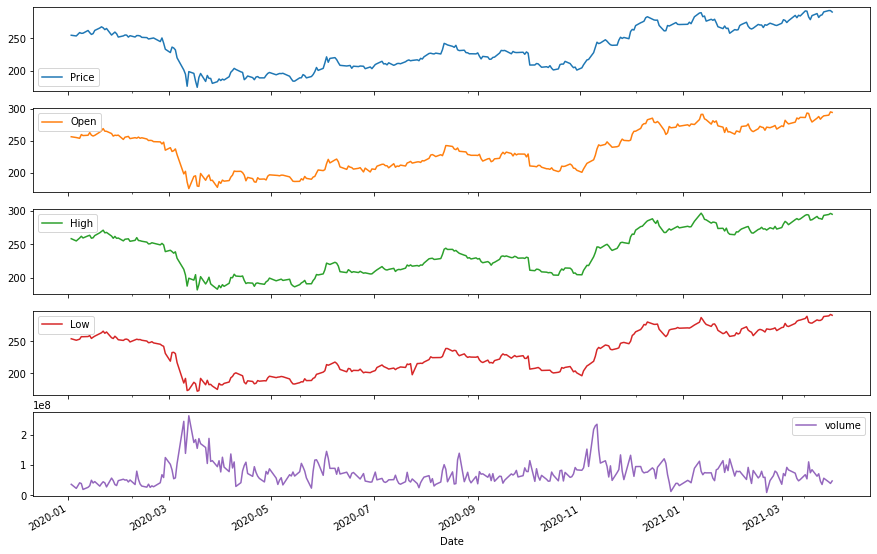

In [ ]:
df2[df2['Country']=='Russia'].plot(subplots = True, figsize =(15, 10))

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

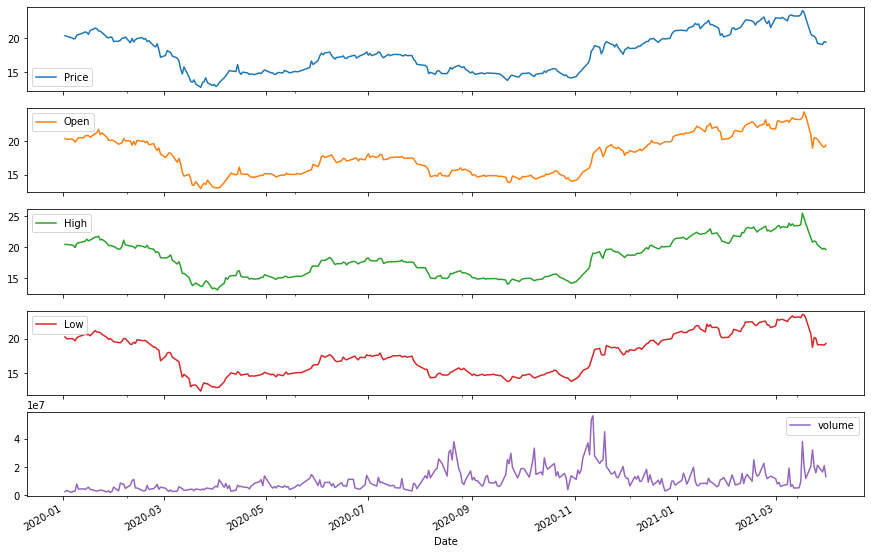

In [ ]:
df2[df2['Country']=='Turkey'].plot(subplots = True, figsize =(15, 10))

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

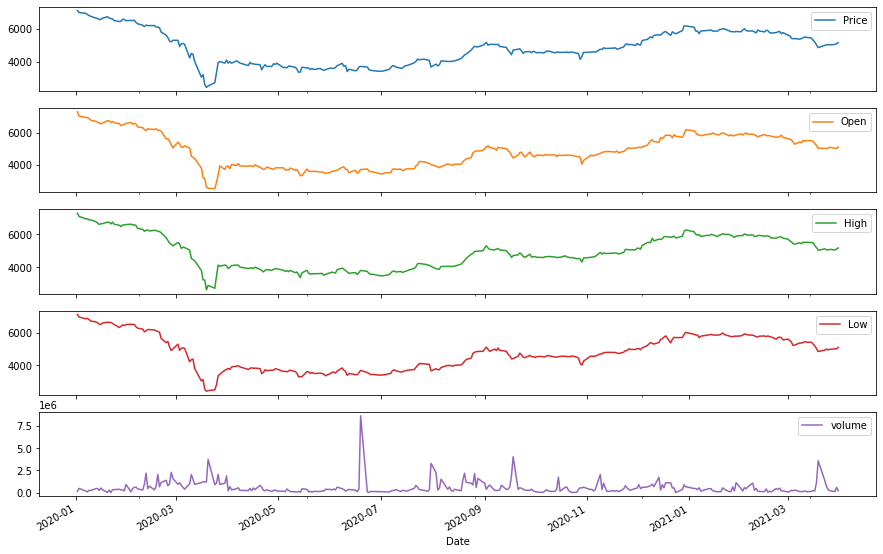

In [ ]:
df2[df2['Country']=='Colombia'].plot(subplots = True, figsize =(15, 10))

In [ ]:
df2[df2['Country']=='SouthAfrica'].plot(subplots = True, figsize =(15, 10))

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

In [ ]:
df2[df2['Country']=='Argentina'].plot(subplots = True, figsize =(15, 10))

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

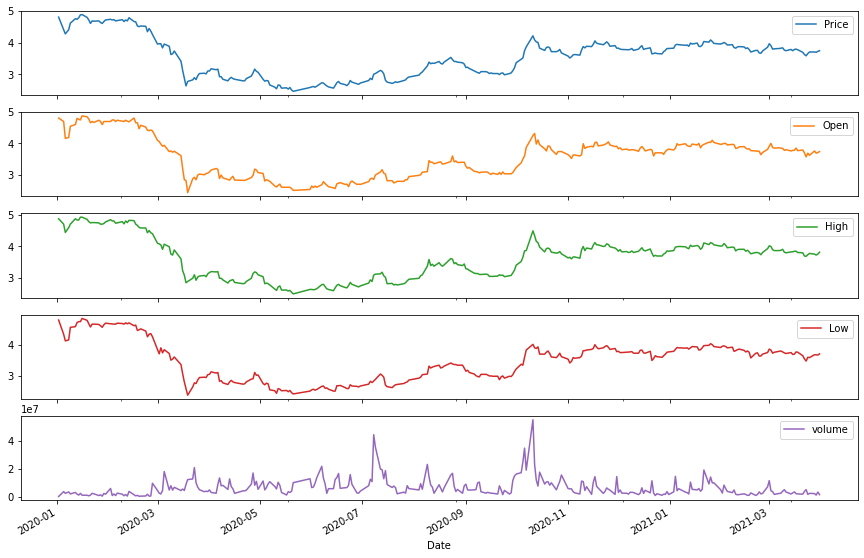

In [ ]:
df2[df2['Country']=='Egypt'].plot(subplots = True, figsize =(15, 10))

# Are Interest Rates Autocorrelated?

In [ ]:
df2 = df[['Price', 'Country', 'Open', 'High', 'Low', 'volume']]

In [ ]:
df2['Price_return'] = df2['Price'].pct_change().mul(100)# return 
# Compute the daily change in interest rates 
df2['price_diff'] = df2['Price'].diff()
df2.head()

Price Country    Open    High     Low      volume  Price_return  \
Date                                                                           
2021-03-31  291.02  Russia  294.00  294.42  290.26  47000000.0           NaN   
2021-03-30  293.25  Russia  294.86  295.72  291.50  38810000.0      0.766270   
2021-03-29  293.30  Russia  289.72  294.09  289.26  43680000.0      0.017050   
2021-03-26  291.22  Russia  288.63  292.75  288.32  56070000.0     -0.709171   
2021-03-25  286.66  Russia  286.50  287.03  283.85  35220000.0     -1.565827   

            price_diff  
Date                    
2021-03-31         NaN  
2021-03-30        2.23  
2021-03-29        0.05  
2021-03-26       -2.08  
2021-03-25       -4.56

In [ ]:
#df2['shifted']=df2.Price.shift() # default 1
#df2['change'] = df2.Price.div(df2.shifted)
#df2['return']= df2.change.sub(1).mul(100)

In [ ]:
Interest = df[['Price', 'Country']]
Interest = Interest.pivot(columns='Country', values= 'Price')
Interest.bfill(inplace=True)
Interest.head()

Country     Argentina  Brazil  Colombia  Egypt  Russia  SouthAfrica  \
Date                                                                  
2020-01-02      48.25   12.57    7120.0   4.81  255.00      14330.0   
2020-01-03      48.80   12.90    7000.0   4.41  255.00      14843.0   
2020-01-05      48.50   12.89    6950.0   4.41  253.90      14620.0   
2020-01-06      48.50   12.89    6950.0   4.28  253.90      14620.0   
2020-01-07      47.60   13.48    6950.0   4.41  259.15      14500.0   

Country     SouthKorea  Turkey  
Date                            
2020-01-02      5850.0   20.38  
2020-01-03      5900.0   20.30  
2020-01-05      5730.0   20.08  
2020-01-06      5730.0   20.08  
2020-01-07      5690.0   19.93

In [ ]:
for col in Interest.columns:
  # Compute the daily change in interest rates 
  Interest[col+'_int'] = Interest[col].diff()

In [ ]:
Interest.head()

Country     Argentina  Brazil  Colombia  Egypt  Russia  SouthAfrica  \
Date                                                                  
2020-01-02      48.25   12.57    7120.0   4.81  255.00      14330.0   
2020-01-03      48.80   12.90    7000.0   4.41  255.00      14843.0   
2020-01-05      48.50   12.89    6950.0   4.41  253.90      14620.0   
2020-01-06      48.50   12.89    6950.0   4.28  253.90      14620.0   
2020-01-07      47.60   13.48    6950.0   4.41  259.15      14500.0   

Country     SouthKorea  Turkey  Argentina_int  Brazil_int  Colombia_int  \
Date                                                                      
2020-01-02      5850.0   20.38            NaN         NaN           NaN   
2020-01-03      5900.0   20.30           0.55        0.33        -120.0   
2020-01-05      5730.0   20.08          -0.30       -0.01         -50.0   
2020-01-06      5730.0   20.08           0.00        0.00           0.0   
2020-01-07      5690.0   19.93          -0.90        0.59           0.0   

Country     Egypt_int  Russia_int  SouthAfrica_int  SouthKorea_int  Turkey_int  
Date                                                                            
2020-01-02        NaN         NaN              NaN             NaN         NaN  
2020-01-03      -0.40        0.00            513.0            50.0       -0.08  
2020-01-05       0.00       -1.10           -223.0          -170.0       -0.22  
2020-01-06      -0.13        0.00              0.0             0.0        0.00  
2020-01-07       0.13        5.25           -120.0           -40.0       -0.15

In [ ]:
Interest.columns

Index(['Argentina', 'Brazil', 'Colombia', 'Egypt', 'Russia', 'SouthAfrica',
       'SouthKorea', 'Turkey', 'Argentina_int', 'Brazil_int', 'Colombia_int',
       'Egypt_int', 'Russia_int', 'SouthAfrica_int', 'SouthKorea_int',
       'Turkey_int'],
      dtype='object', name='Country')

In [ ]:
autocor_int = {}
for col in Interest.columns:
  # Compute and print the autocorrelation of returns
  autocor_int[col] = Interest[col].autocorr()

In [ ]:
#autocor_int

# Time serie eval -- seasonal_decompose

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
df4 = df[['Price', 'Country']].copy()
df4= df4.pivot(columns='Country', values= 'Price')
df4.bfill(inplace=True)
df4.head()

Country     Argentina  Brazil  Colombia  Egypt  Russia  SouthAfrica  \
Date                                                                  
2020-01-02      48.25   12.57    7120.0   4.81  255.00      14330.0   
2020-01-03      48.80   12.90    7000.0   4.41  255.00      14843.0   
2020-01-05      48.50   12.89    6950.0   4.41  253.90      14620.0   
2020-01-06      48.50   12.89    6950.0   4.28  253.90      14620.0   
2020-01-07      47.60   13.48    6950.0   4.41  259.15      14500.0   

Country     SouthKorea  Turkey  
Date                            
2020-01-02      5850.0   20.38  
2020-01-03      5900.0   20.30  
2020-01-05      5730.0   20.08  
2020-01-06      5730.0   20.08  
2020-01-07      5690.0   19.93

In [ ]:
cb = df4[['Colombia']].rename(columns={'Colombia':'price'}, index=None)
cb.head()

Country      price
Date              
2020-01-02  7120.0
2020-01-03  7000.0
2020-01-05  6950.0
2020-01-06  6950.0
2020-01-07  6950.0

In [ ]:
df.sort_index(inplace=True)

In [ ]:
plt.rcParams['figure.figsize'] = (10, 7)
plt.style.use('seaborn-colorblind')

In [ ]:
plt.figure(figsize=(20, 10))
dec = seasonal_decompose(cb['price'], period = 52).plot()
plt.show()

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

# Stationarity of time serie

## Augmented Dickey-Fuller Test
Augmented Dickey-Fuller Test is a common statistical test used to test whether a given Time series is stationary or not. We can achieve this by defining the null and alternate hypothesis.

Null Hypothesis: Time Series is no stationary. It gives a time-dependent trend.

Alternate Hypothesis: Time Series is stationary. In another term, the series doesn’t depend on time.

ADF or t Statistic < critical values: Accept the alternative hypothesis. Time series is stationary.

ADF or t Statistic > critical values: Failed to reject the null hypothesis. The time series is non-stationary

if p-value is not less than .05 (depend on the alpha), we fail to reject the null hypothesis. This means the time series is non-stationary.

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

In [ ]:
def check_stationarity_ADF(serie):
    result = adfuller(serie)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    if result[0] < result[4]["5%"]:
        print ("Reject Ho - and the Time Series is Stationary")
    else:
         print ("Failed to Reject Ho -and the Time Series is Non-Stationary")

In [ ]:
def adfuller_test(series, sig=0.05, name=''):
    res = adfuller(series, autolag='AIC')    
    p_value = round(res[1], 3) 

    if p_value <= sig:
        print(f" {name} : P-Value = {p_value} => Stationary. ")
    else:
        print(f" {name} : P-Value = {p_value} => Non-stationary.")

## KPSS Test

Unlike KPSS test, the null hypothesis is the series is stationary. Based upon the significance level of 0.05 and the p-value of KPSS test, if if P < 0.05 , there is evidence for rejecting the null hypothesis in favor of the alternative. Hence, the series is non-stationary as per the KPSS test. otherwise, the serie is stationary.

It is always better to apply both the tests, so that it can be ensured that the series is truly stationary. Here, due to the difference in the results from ADF test and KPSS test, it can be inferred that the series is trend stationary and not strict stationary. The series can be detrended by differencing or by model fitting

In [ ]:
def kpss_test(series, sig=0.05, name=''):
    statistic, p_value, n_lags, critical_values = kpss(series, nlags='auto')    
    p_value = round(p_value, 3) 
    if p_value <= sig:
        print(f" {name} : P-Value = {p_value} => Non Stationary. ")
    else:
        print(f" {name} : P-Value = {p_value} => stationary.")

In [ ]:
cb.head(2)

Country      price
Date              
2020-01-02  7120.0
2020-01-03  7000.0

In [ ]:
adfuller_test(cb.price, sig=0.05, name='Colombia_price')

 Colombia_price : P-Value = 0.173 => Non-stationary.


In [ ]:
kpss_test(cb.price, sig=0.05, name='Colombia_price')

 Colombia_price : P-Value = 0.012 => Non Stationary. 


In [ ]:
adfuller_test(cb['price'].diff().dropna(), sig=0.05, name='Colombia_price')

 Colombia_price : P-Value = 0.0 => Stationary. 


In [ ]:
kpss_test(cb.price.diff().diff().dropna(), sig=0.05, name='Colombia_price')

 Colombia_price : P-Value = 0.1 => stationary.


In [ ]:

def plot_correlations(serie):
    fig, ax = plt.subplots(figsize=(8, 5))
    _ = plot_acf(serie, ax=ax)
    fig, ax = plt.subplots(figsize=(8, 5))
    _ = plot_pacf(serie, ax=ax)

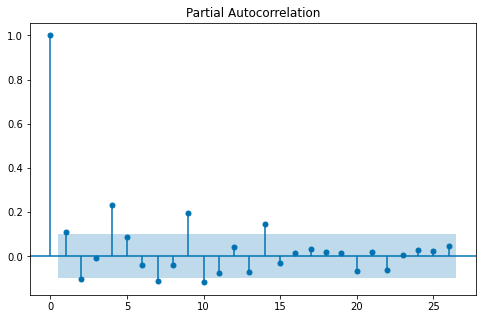

In [ ]:
plot_correlations(cb.price.diff().dropna())

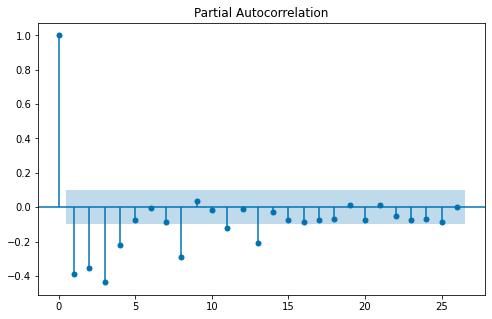

In [ ]:
plot_correlations(cb.price.diff().diff().dropna())

In [ ]:
# Split the data into a train and test set
def train_test(df):
    train = df.loc[:'2020']
    test = df.loc['2021':]
    return train, test 

In [ ]:
def plot_price_vol(train, test, col): # df is train or test
    # Create an axis
    fig, ax = plt.subplots(figsize=(15,8))

    # Plot the train and test sets on the axis ax
    train[[col]].plot(ax=ax)
    test[[col]].plot(ax=ax)
    ax.set_title( col + ' ' + 'train and test set', fontsize=20)
    plt.show()

In [ ]:
cb.columns,  cb.index

(Index(['price'], dtype='object', name='Country'),
 DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-05', '2020-01-06',
                '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
                '2020-01-12', '2020-01-13',
                ...
                '2021-03-21', '2021-03-22', '2021-03-23', '2021-03-24',
                '2021-03-25', '2021-03-26', '2021-03-28', '2021-03-29',
                '2021-03-30', '2021-03-31'],
               dtype='datetime64[ns]', name='Date', length=387, freq=None))

In [ ]:
cb.loc[:'2020'].head()

Country      price
Date              
2020-01-02  7120.0
2020-01-03  7000.0
2020-01-05  6950.0
2020-01-06  6950.0
2020-01-07  6950.0

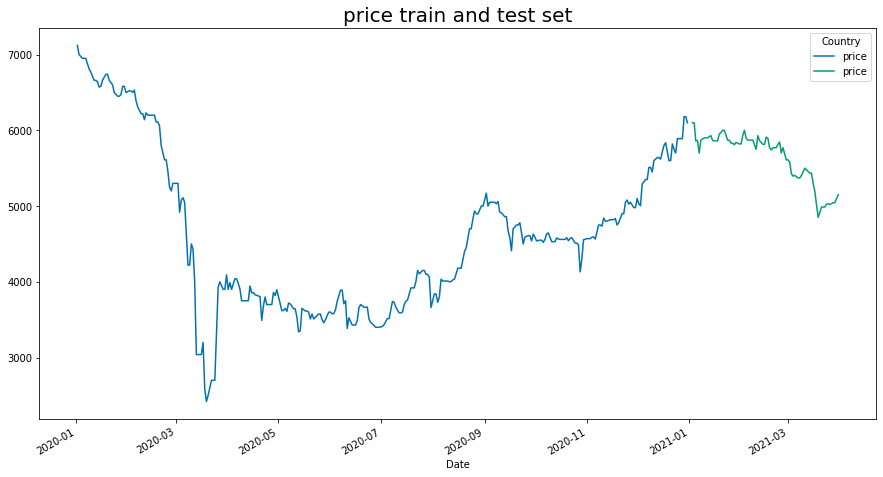

In [ ]:
# split data into test and train set
train, test = train_test(cb)
# plot the train and test set
plot_price_vol(train, test, 'price')

In [ ]:
len(cb), len(train), len(test)

(387, 310, 77)

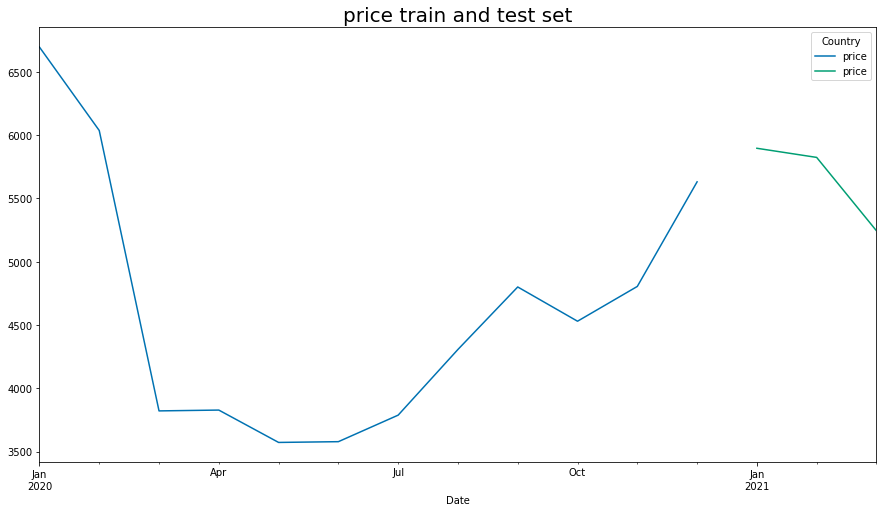

In [ ]:
#resample the dataset , split and plot 
# split data into test and train set

trainm, testm = train_test(cb.resample('M').mean().dropna())

# plot the train and test set
plot_price_vol(trainm, testm, 'price')

In [ ]:

#import pmdarima as pm
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import os
# Import mean_squared_error and ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
def find_order(train, column, p, q, d):
    import warnings
    warnings.filterwarnings("ignore")
    # Create empty list to store search results
    order_aic_bic=[]

    # Loop over p values 
    for p in range(0,9):
      # Loop over q values 
        for q in range(0,2):
             # Loop over d values 
            for d in range(0,1): 
                try:
                # create and fit ARMA(p,q) model
                    model = SARIMAX(train[[col]], order=(p,d,q))
                    results = model.fit()    
                # Append order and results tuple
                    order_aic_bic.append((p,q,d, results.aic, results.bic))
                except:
                    print(p, q, None, None)
                    #continue
    # Construct DataFrame from order_aic_bic
    order_df = pd.DataFrame(order_aic_bic,columns=['p', 'q','d', 'AIC', 'BIC'])

    # Print order_df in order of increasing AIC
    #order_df.sort_values('AIC').head(2)
    # Print order_df in order of increasing BIC
    #order_df.sort_values('BIC').head(2)
    
    return order_df

In [ ]:
import warnings
warnings.filterwarnings("ignore")
# Create empty list to store search results
order_aic_bic=[]

# Loop over p values 
for p in range(0,9):
  # Loop over q values 
    for q in range(0,9):
         # Loop over d values 
        for d in range(0,3): 
            try:
            # create and fit ARMA(p,q) model
                model = SARIMAX(train[['price']], order=(p,d,q))
                results = model.fit()    
            # Append order and results tuple
                order_aic_bic.append((p,q,d, results.aic, results.bic))
            except:
                print(p, q, None, None)
                #continue
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic, 
                        columns=['p', 'q','d', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
order_df.sort_values('AIC').head(2)

p  q  d          AIC          BIC
227  8  3  2  3896.793266  3941.554464
212  7  7  2  3898.424701  3954.376198

In [ ]:
# Print order_df in order of increasing AIC
order_df.sort_values('AIC').head(5)
order_df.sort_values('AIC').tail(5)

p  q  d          AIC          BIC
227  8  3  2  3896.793266  3941.554464
212  7  7  2  3898.424701  3954.376198
215  7  8  2  3898.446980  3958.128577
206  7  5  2  3898.482224  3946.973521
152  5  5  2  3898.903074  3939.934171

p  q  d          AIC          BIC
21  0  7  0  5050.198255  5080.090834
9   0  3  0  5099.518724  5114.465014
6   0  2  0  5486.016207  5497.225924
3   0  1  0  5712.342758  5719.815903
0   0  0  0  6128.124635  6131.861207

In [ ]:
order_aic_bicm=[]

# Loop over p values 
for p in range(0,9):
  # Loop over q values 
    for q in range(0,9):
         # Loop over d values 
        for d in range(0,3): 
            try:
            # create and fit ARMA(p,q) model
                model = SARIMAX(trainm[['price']], order=(p,d,q))
                results = model.fit()    
            # Append order and results tuple
                order_aic_bicm.append((p,q,d, results.aic, results.bic))
            except:
                print(p, q, None, None)
                #continue
# Construct DataFrame from order_aic_bic
order_dfm = pd.DataFrame(order_aic_bicm, 
                        columns=['p', 'q','d', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
order_dfm.sort_values('AIC').head(5)

1 3 None None
1 3 None None
2 3 None None
2 3 None None
3 1 None None
3 2 None None
3 3 None None
3 3 None None
4 1 None None
4 2 None None
4 3 None None
4 3 None None
5 1 None None
5 3 None None
5 3 None None
6 0 None None
6 0 None None
6 0 None None
6 3 None None
6 3 None None
7 2 None None
7 3 None None
7 3 None None
8 0 None None
8 2 None None
8 3 None None
8 3 None None


p  q  d        AIC        BIC
127  5  1  2  14.000000  16.118096
195  8  1  0  20.000000  24.849066
197  8  1  2  20.000000  23.025851
174  7  1  2  47.278403  50.001669
198  8  2  0  56.414816  61.748789

In [ ]:
import numpy as np

In [ ]:
def sarimax_fit_plot_sum(trainm, col, p,q,d):
    # Fit model
    model_1 = SARIMAX(trainm[[col]], 
                      order=(p,d,q), 
                      trend='c')
    results_1 = model_1.fit()
    mae = np.mean(np.abs(results_1.resid)) # mean absolute error from residuals
    Summary= results_1.summary()
    # Make plot of time series for comparison #  four plots, shows us the distribution of the residuals
    Diagnostic = results_1.plot_diagnostics()
    plt.show()
    return Diagnostic, results_1, mae, Summary

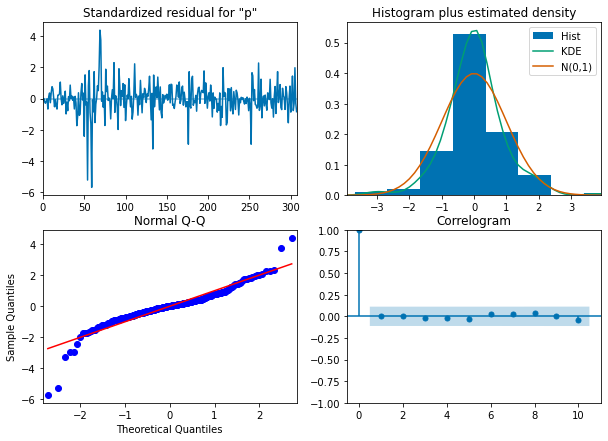

In [ ]:
Diagnostic, results_1, mae, Summary = sarimax_fit_plot_sum(train, 'price', 8,3,2)

In [ ]:
def sarimax_fit_plot_sum(trainm, col, p,q,d):
    # Fit model
    model_1 = SARIMAX(trainm[[col]], 
                      order=(p,d,q), 
                      trend='c')
    results_1 = model_1.fit()
    mae = np.mean(np.abs(results_1.resid)) # mean absolute error from residuals
    Summary= results_1.summary()
    # Make plot of time series for comparison #  four plots, shows us the distribution of the residuals
    Diagnostic = results_1.plot_diagnostics()
    plt.show()
    return Diagnostic, results_1, mae, Summary

In [ ]:
trainm[['price']]

Country           price
Date                   
2020-01-31  6696.153846
2020-02-29  6037.083333
2020-03-31  3821.296296
2020-04-30  3827.800000
2020-05-31  3572.083333
2020-06-30  3578.076923
2020-07-31  3787.777778
2020-08-31  4306.923077
2020-09-30  4800.576923
2020-10-31  4529.923077
2020-11-30  4804.807692
2020-12-31  5631.296296

In [ ]:
model_1 = SARIMAX(trainm[['price']], 
                      order=(p,d,q), 
                      trend='c')
results_1 = model_1.fit()

In [ ]:
mae = np.mean(np.abs(results_1.resid)) # mean absolute error from residuals
Summary= results_1.summary()
#Summary

In [ ]:
results_1

ValueError: ignored

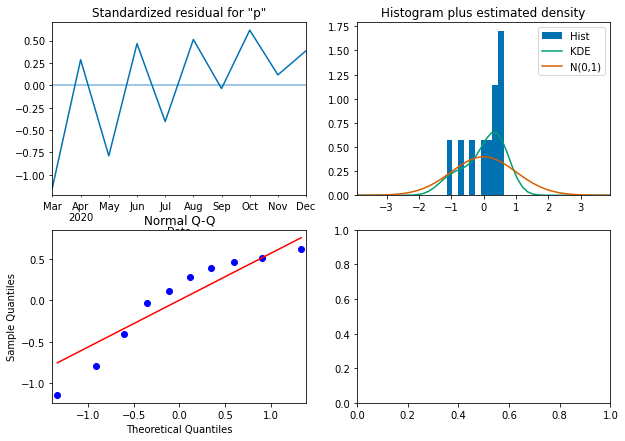

In [ ]:
Diagnostic = results_1.plot_diagnostics()
plt.show()

LinAlgError: ignored

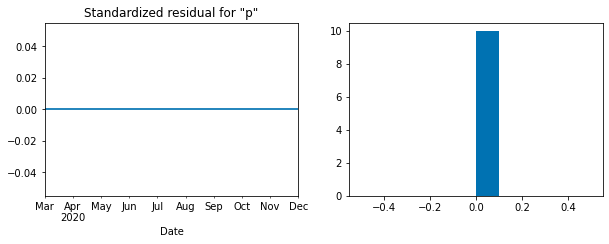

In [ ]:
Diagnostic, results_1, mae, Summary = sarimax_fit_plot_sum(trainm, 'price', 5,1,2)

In [ ]:
def sarimax_plot_origin_pred(trainm, col, p, d, q): # work with monthly and daily
    model_1 = SARIMAX(trainm[[col]],order=(p,d,q), trend='c')
    results_1 = model_1.fit()
    #Visualize the original dataset plotted against our model.
    fig, ax = plt.subplots(figsize=(10,7))  
    tr = trainm[col].plot(ax=ax)
    pred = results_1.predict().plot(ax=ax, color = 'red')#model_ny_con_fit
    
    plt.show()
    
    return tr, pred

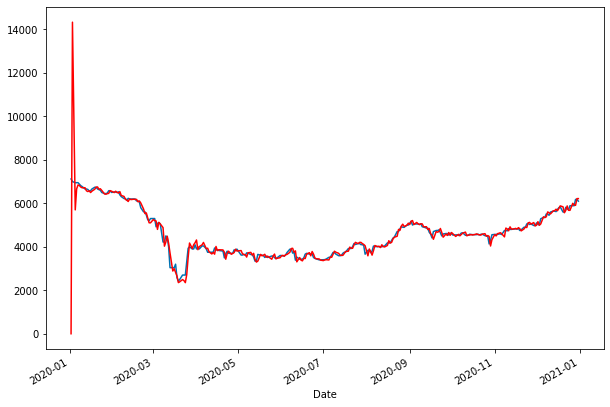

(<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>)

In [ ]:
sarimax_plot_origin_pred(train, 'price', 8, 3, 2)

# Stock Market Predictions with LSTM

Long Short-Term Memory (LSTM) models are powerful, especially for retaining a long-term memory, by design, as you will see later. are extremely powerful time-series models. They can predict an arbitrary number of steps into the future. 
LSTM is suitable for processing Sequential Data.

## Colombia stock 

In [ ]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df.head()

Price     Open     High      Low  Change %     Country  \
Date                                                                   
2020-01-02    48.25    49.35    50.20    47.55   -0.0292   Argentina   
2020-01-02  5850.00  5930.00  5980.00  5820.00   -0.0168  SouthKorea   
2020-01-02    20.38    20.42    20.44    20.24    0.0030      Turkey   
2020-01-02    12.57    12.88    12.99    12.57   -0.0210      Brazil   
2020-01-02     4.81     4.81     4.87     4.78   -0.0021       Egypt   

               volume  shifted    change    return  pct_return_3d  
Date                                                               
2020-01-02   878500.0    48.80  0.988730 -1.127049      -1.127049  
2020-01-02   239900.0  5900.00  0.991525 -0.847458      -0.847458  
2020-01-02  2530000.0    20.30  1.003941  0.394089       0.394089  
2020-01-02  5780000.0    12.90  0.974419 -2.558140      -2.558140  
2020-01-02   241600.0     4.41  1.090703  9.070295       9.070295

In [ ]:
df.columns

Index(['Price', 'Open', 'High', 'Low', 'Change %', 'Country', 'volume',
       'shifted', 'change', 'return', 'pct_return_3d'],
      dtype='object')

In [ ]:
df.Country.unique()

array(['Argentina', 'SouthKorea', 'Turkey', 'Brazil', 'Egypt', 'Colombia',
       'SouthAfrica', 'Russia'], dtype=object)

In [ ]:
dff=df[['Price', 'Open', 'High', 'Low', 'Change %', 'Country', 'volume']].copy().reset_index()
cbb = dff[dff['Country']=='Colombia']
cbb.drop(columns='Country', inplace=True)
cbb.reset_index(inplace=True, drop=True)
cbb.head()

Date   Price    Open    High     Low  Change %    volume
0 2020-01-02  7120.0  7300.0  7300.0  7120.0   -0.0247  138960.0
1 2020-01-03  7000.0  7040.0  7100.0  6960.0   -0.0169  470770.0
2 2020-01-07  6950.0  6950.0  6950.0  6850.0   -0.0071  168710.0
3 2020-01-08  6880.0  6940.0  6950.0  6880.0   -0.0101   84930.0
4 2020-01-09  6810.0  6880.0  6890.0  6800.0   -0.0102  262890.0

In [ ]:
cbb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      303 non-null    datetime64[ns]
 1   Price     303 non-null    float64       
 2   Open      303 non-null    float64       
 3   High      303 non-null    float64       
 4   Low       303 non-null    float64       
 5   Change %  303 non-null    float64       
 6   volume    303 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 16.7 KB


In [ ]:
cbb.isna().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Change %    0
volume      0
dtype: int64

In [ ]:
cbb.shape[0]

303

In [ ]:
cbb['Date'].loc[::303]

0   2020-01-02
Name: Date, dtype: datetime64[ns]

<Figure size 1296x648 with 0 Axes>

(array([18262., 18322., 18383., 18444., 18506., 18567., 18628., 18687.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Mid Price')

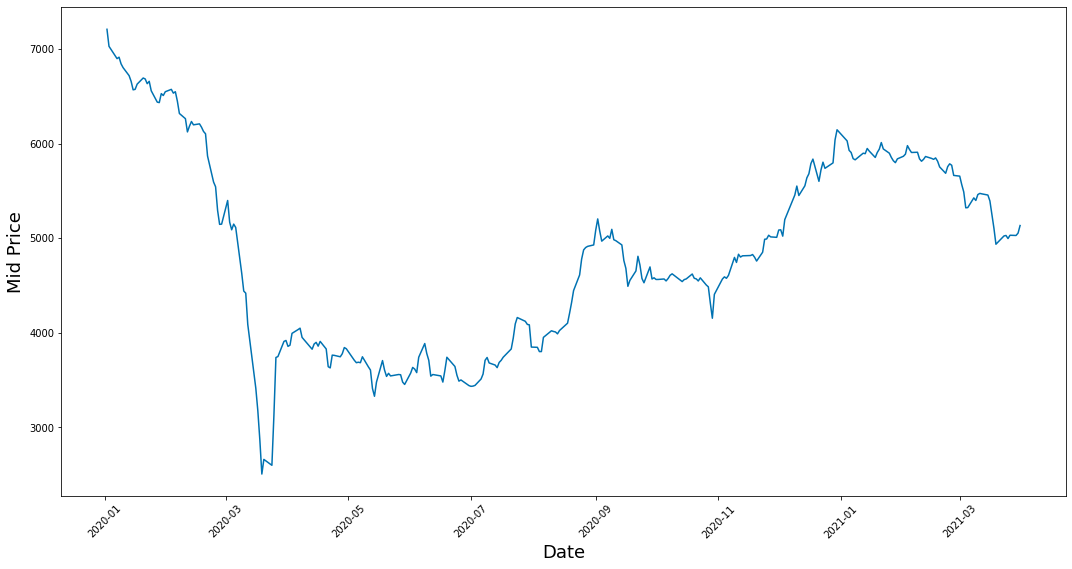

In [ ]:
# 
plt.figure(figsize = (18,9))
plt.plot(cbb.Date,(cbb['Low']+cbb['High'])/2.0)
#plt.plot(cb.Date,(cb['Open'])
plt.xticks(rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

##  one

https://cnvrg.io/pytorch-lstm/


https://github.com/abhinav-TB/Time-Series-Forecasting-Using-LSTM

In [ ]:
cbb.head()

Date   Price    Open    High     Low  Change %    volume
0 2020-01-02  7120.0  7300.0  7300.0  7120.0   -0.0247  138960.0
1 2020-01-03  7000.0  7040.0  7100.0  6960.0   -0.0169  470770.0
2 2020-01-07  6950.0  6950.0  6950.0  6850.0   -0.0071  168710.0
3 2020-01-08  6880.0  6940.0  6950.0  6880.0   -0.0101   84930.0
4 2020-01-09  6810.0  6880.0  6890.0  6800.0   -0.0102  262890.0

In [ ]:
cbb.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Change %', 'volume'], dtype='object')

In [ ]:
cbd = cbb.set_index('Date')
cbd.head(2)

Price    Open    High     Low  Change %    volume
Date                                                          
2020-01-02  7120.0  7300.0  7300.0  7120.0   -0.0247  138960.0
2020-01-03  7000.0  7040.0  7100.0  6960.0   -0.0169  470770.0

In [ ]:
cbd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 303 entries, 2020-01-02 to 2021-03-31
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     303 non-null    float64
 1   Open      303 non-null    float64
 2   High      303 non-null    float64
 3   Low       303 non-null    float64
 4   Change %  303 non-null    float64
 5   volume    303 non-null    float64
dtypes: float64(6)
memory usage: 16.6 KB


In [ ]:
X = cbd.iloc[:, :1]
y = cbd.iloc[:, 1:]
X.head(2)
y.head(2)

Price
Date              
2020-01-02  7120.0
2020-01-03  7000.0

Open    High     Low  Change %    volume
Date                                                  
2020-01-02  7300.0  7300.0  7120.0   -0.0247  138960.0
2020-01-03  7040.0  7100.0  6960.0   -0.0169  470770.0

In [ ]:
# Split the data into a train and test set
def train_test(df):
    train = df.loc['2020']
    test = df.loc['2021']
    return train, test 

In [ ]:
#train and test dataframe 
train, test = train_test(cbd)
len(train), len(test)

(242, 61)

In [ ]:
X_trainn = train.iloc[:, 1:]
X_testt = test.iloc[:, 1:]
y_trainn = train.iloc[:, :1]
y_testt = test.iloc[:, :1]

In [ ]:
#X_trainn = cbd[cbd['year']== 2020].iloc[:, 1:]
#X_testt = cbd[cbd['year']== 2021].iloc[:, 1:]
#y_trainn = cbd[cbd['year']== 2020].iloc[:, :1]
#y_testt = cbd[cbd['year']== 2021].iloc[:, :1]

In [ ]:
len(X_trainn), len(X_testt), len(y_trainn), len(y_testt)

(242, 61, 242, 61)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
mm = MinMaxScaler()
ss = StandardScaler()


X_train = ss.fit_transform(X_trainn)
y_train = mm.fit_transform(y_trainn) 
X_test = ss.fit_transform(X_testt)
y_test = mm.fit_transform(y_testt)

In [ ]:
X_train[:2], y_train[:2]

(array([[ 2.54723779,  2.5078836 ,  2.45745606, -0.61114207, -0.58546542],
        [ 2.29768707,  2.3136532 ,  2.30369952, -0.41938493, -0.1673912 ]]),
 array([[1.        ],
        [0.97446809]]))

In [ ]:
print("Training Shape", X_train.shape, y_train.shape)
print("Testing Shape", X_test.shape, y_test.shape)

Training Shape (242, 5) (242, 1)
Testing Shape (61, 5) (61, 1)


In [ ]:
import torch #pytorch
import torch.nn as nn
from torch.autograd import Variable 

In [ ]:
# convert the Numpy Arrays to Tensors and to Variables 
X_train_tensors = Variable(torch.Tensor(X_train))
X_test_tensors = Variable(torch.Tensor(X_test))

y_train_tensors = Variable(torch.Tensor(y_train))
y_test_tensors = Variable(torch.Tensor(y_test))

In [ ]:
X_train_tensors

tensor([[ 2.5472,  2.5079,  2.4575, -0.6111, -0.5855],
        [ 2.2977,  2.3137,  2.3037, -0.4194, -0.1674],
        [ 2.2113,  2.1680,  2.1980, -0.1785, -0.5480],
        ...,
        [ 1.0163,  1.1386,  1.0977,  0.8147, -0.3323],
        [ 1.2035,  1.4202,  1.2851,  1.2056,  0.3441],
        [ 1.4723,  1.5125,  1.4004, -0.0039,  0.0607]])

In [ ]:
#reshaping to rows, timestamps, features

X_train_tensors_final = torch.reshape(X_train_tensors,   (X_train_tensors.shape[0], 1, X_train_tensors.shape[1]))


X_test_tensors_final = torch.reshape(X_test_tensors,  (X_test_tensors.shape[0], 1, X_test_tensors.shape[1])) 

In [ ]:
#Now you can confirm the shape of the dataset via printing the shapes.
print("Training Shape", X_train_tensors_final.shape, y_train_tensors.shape)
print("Testing Shape", X_test_tensors_final.shape, y_test_tensors.shape)

Training Shape torch.Size([242, 1, 5]) torch.Size([242, 1])
Testing Shape torch.Size([61, 1, 5]) torch.Size([61, 1])


In [ ]:
class LSTM1(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(LSTM1, self).__init__()
        self.num_classes = num_classes #number of classes
        self.num_layers = num_layers #number of layers
        self.input_size = input_size #input size
        self.hidden_size = hidden_size #hidden state
        self.seq_length = seq_length #sequence length

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                          num_layers=num_layers, batch_first=True) #lstm
        self.fc_1 =  nn.Linear(hidden_size, 128) #fully connected 1
        self.fc = nn.Linear(128, num_classes) #fully connected last layer

        self.relu = nn.ReLU()
    
    def forward(self,x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #hidden state
        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #internal state
        # Propagate input through LSTM
        output, (hn, cn) = self.lstm(x, (h_0, c_0)) #lstm with input, hidden, and internal state
        hn = hn.view(-1, self.hidden_size) #reshaping the data for Dense layer next
        out = self.relu(hn)
        out = self.fc_1(out) #first Dense
        out = self.relu(out) #relu
        out = self.fc(out) #Final Output
        return out

In [ ]:
num_epochs = 5000 #1000 epochs
learning_rate = 0.001 #0.001 lr

input_size = 5 #number of features
hidden_size = 2 #number of features in hidden state
num_layers = 1 #number of stacked lstm layers or Number of recurrent layers

num_classes = 1 #number of output classes 

In [ ]:
X_train_tensors_final.shape

torch.Size([242, 1, 5])

In [ ]:
lstm1 = LSTM1(num_classes, input_size, hidden_size, num_layers, X_train_tensors_final.shape[1]) #our lstm class 

In [ ]:
lstm1

LSTM1(
  (lstm): LSTM(5, 2, batch_first=True)
  (fc_1): Linear(in_features=2, out_features=128, bias=True)
  (fc): Linear(in_features=128, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm1.parameters(), lr=learning_rate) 

In [ ]:
for epoch in range(num_epochs):
  outputs = lstm1.forward(X_train_tensors_final) #forward pass
  optimizer.zero_grad() #caluclate the gradient, manually setting to 0
 
  # obtain the loss function
  loss = criterion(outputs, y_train_tensors)
 
  loss.backward() #calculates the loss of the loss function
 
  optimizer.step() #improve from loss, i.e backprop
  if epoch % 100 == 0:
    print("Epoch: %d, loss: %1.5f" % (epoch, loss.item())) 

Epoch: 0, loss: 0.14654
Epoch: 100, loss: 0.01008
Epoch: 200, loss: 0.00466
Epoch: 300, loss: 0.00115
Epoch: 400, loss: 0.00043
Epoch: 500, loss: 0.00025
Epoch: 600, loss: 0.00019
Epoch: 700, loss: 0.00017
Epoch: 800, loss: 0.00015
Epoch: 900, loss: 0.00014
Epoch: 1000, loss: 0.00013
Epoch: 1100, loss: 0.00012
Epoch: 1200, loss: 0.00012
Epoch: 1300, loss: 0.00011
Epoch: 1400, loss: 0.00011
Epoch: 1500, loss: 0.00011
Epoch: 1600, loss: 0.00010
Epoch: 1700, loss: 0.00010
Epoch: 1800, loss: 0.00010
Epoch: 1900, loss: 0.00010
Epoch: 2000, loss: 0.00009
Epoch: 2100, loss: 0.00009
Epoch: 2200, loss: 0.00009
Epoch: 2300, loss: 0.00009
Epoch: 2400, loss: 0.00009
Epoch: 2500, loss: 0.00008
Epoch: 2600, loss: 0.00008
Epoch: 2700, loss: 0.00008
Epoch: 2800, loss: 0.00008
Epoch: 2900, loss: 0.00008
Epoch: 3000, loss: 0.00008
Epoch: 3100, loss: 0.00008
Epoch: 3200, loss: 0.00008
Epoch: 3300, loss: 0.00008
Epoch: 3400, loss: 0.00008
Epoch: 3500, loss: 0.00007
Epoch: 3600, loss: 0.00007
Epoch: 3700, 

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Time-Series Prediction')

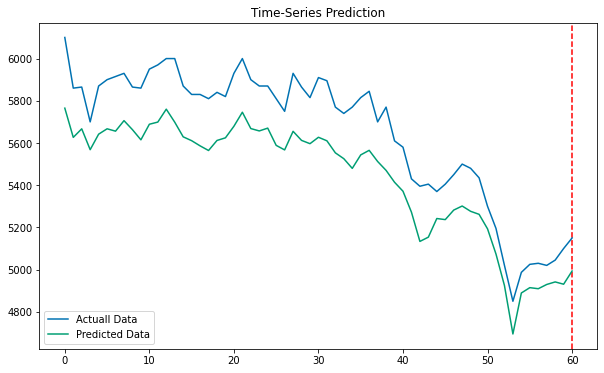

In [ ]:
train_predict = lstm1(X_test_tensors_final)#forward pass
data_predict = train_predict.data.numpy() #numpy conversion
dataY_plot = y_test_tensors.data.numpy()

data_predict = mm.inverse_transform(data_predict) #reverse transformation
dataY_plot = mm.inverse_transform(dataY_plot)
plt.figure(figsize=(10,6)) #plotting
plt.axvline(x=60, c='r', linestyle='--') #size of the training set

plt.plot(dataY_plot, label='Actuall Data') #actual plot
plt.plot(data_predict, label='Predicted Data') #predicted plot
plt.title('Time-Series Prediction')
plt.legend()
plt.show() 

# Verson Two -- Defining a rule for when to buy, hold, or sell stock -- Colombia stock price

In [43]:
df = pd.read_csv("gdrive/MyDrive/Apziva_project/ idUyhPMVgVMlKK80/dffdata_clean.csv", parse_dates = ['Date'], index_col = 'Date')
df.head(2)

Price    Open    High     Low  Change % Country      volume
Date                                                                    
2021-03-31  291.02  294.00  294.42  290.26   -0.0076  Russia  47000000.0
2021-03-30  293.25  294.86  295.72  291.50   -0.0002  Russia  38810000.0

In [44]:
cbd=df[['Price', 'Open', 'High', 'Low', 'Change %', 'Country', 'volume']].copy()
cbd = df[df['Country']=='Colombia'].copy()
cbd.drop(columns='Country', inplace=True)
#cbd.reset_index(inplace=True, drop=True)
cbd.head()

Price    Open    High     Low  Change %    volume
Date                                                          
2021-03-31  5150.0  5100.0  5170.0  5100.0    0.0098  212440.0
2021-03-30  5100.0  5010.0  5100.0  5010.0    0.0109  583700.0
2021-03-29  5045.0  5020.0  5045.0  5015.0    0.0050  117540.0
2021-03-26  5020.0  5085.0  5085.0  4980.0   -0.0020  203460.0
2021-03-25  5030.0  5035.0  5045.0  4950.0    0.0010  317060.0

In [ ]:
#cbd.set_index('Date').head(5) # colombia data stock marcket 

In [7]:
cbd.shape

(303, 6)

In [6]:
cbd.isna().sum()

Price       0
Open        0
High        0
Low         0
Change %    0
volume      0
dtype: int64

# Defining a rule for when to buy, hold, or sell stock

Determine the moving averages: Calculate the short-term and long-term moving averages of the stock price. Short-term moving averages can be calculated over a period of 7 days, while long-term moving averages can be calculated over a period of 30 days.

Determine the crossover points: Identify the points where the short-term moving average crosses above or below the long-term moving average. 

- When the short-term moving average crosses above the long-term moving average, it is known as a "golden cross," which is a bullish signal.
- When the short-term moving average crosses below the long-term moving average, it is known as a "death cross," which is a bearish signal.

Define the buying and selling signals: Once the crossover points have been identified, define the buying and selling signals. For example, when a golden cross occurs, it can be a signal to buy the stock. When a death cross occurs, it can be a signal to sell the stock.

Set up the strategy: Use the buying and selling signals to set up a trading strategy. For example, when a golden cross occurs, buy the stock and hold it until a death cross occurs, at which point sell the stock.

## When to Buy, Hold  and Sell (historical data)

A common rule for deciding when to buy, hold, or sell a stock is to use moving averages. The basic idea is to compare the stock price to its average over a certain period of time, and make decisions based on whether the price is above or below that average. Here's an example of how to implement this rule using Python and a pandas dataframe:

In [45]:
# Compute a 20-day moving average of the stock price
cbd['MA20'] = cbd['Price'].rolling(window=20).mean()

# Create a new column indicating whether the price is above or below the 20-day moving average
cbd['Signal'] = None
cbd.loc[cbd['Price'] < cbd['MA20'], 'Signal'] = 'Buy' # Change <
cbd.loc[cbd['Price'] > cbd['MA20'], 'Signal'] = 'Sell' # change >
cbd.loc[cbd['Price'] == cbd['MA20'], 'Signal'] = 'Hold'

# Print the resulting dataframe
cbd.head(5)

Price    Open    High     Low  Change %    volume  MA20 Signal
Date                                                                       
2021-03-31  5150.0  5100.0  5170.0  5100.0    0.0098  212440.0   NaN   None
2021-03-30  5100.0  5010.0  5100.0  5010.0    0.0109  583700.0   NaN   None
2021-03-29  5045.0  5020.0  5045.0  5015.0    0.0050  117540.0   NaN   None
2021-03-26  5020.0  5085.0  5085.0  4980.0   -0.0020  203460.0   NaN   None
2021-03-25  5030.0  5035.0  5045.0  4950.0    0.0010  317060.0   NaN   None

In [9]:
cbd.Signal.value_counts()

Sell    158
Buy     126
Name: Signal, dtype: int64

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Price')

Text(0.5, 1.0, 'Price Stock with Annotations')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, -20, 'Sell')

Text(0, 10, 'Buy')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, 10, 'Buy')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, 10, 'Buy')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, 10, 'Buy')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, 10, 'Buy')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

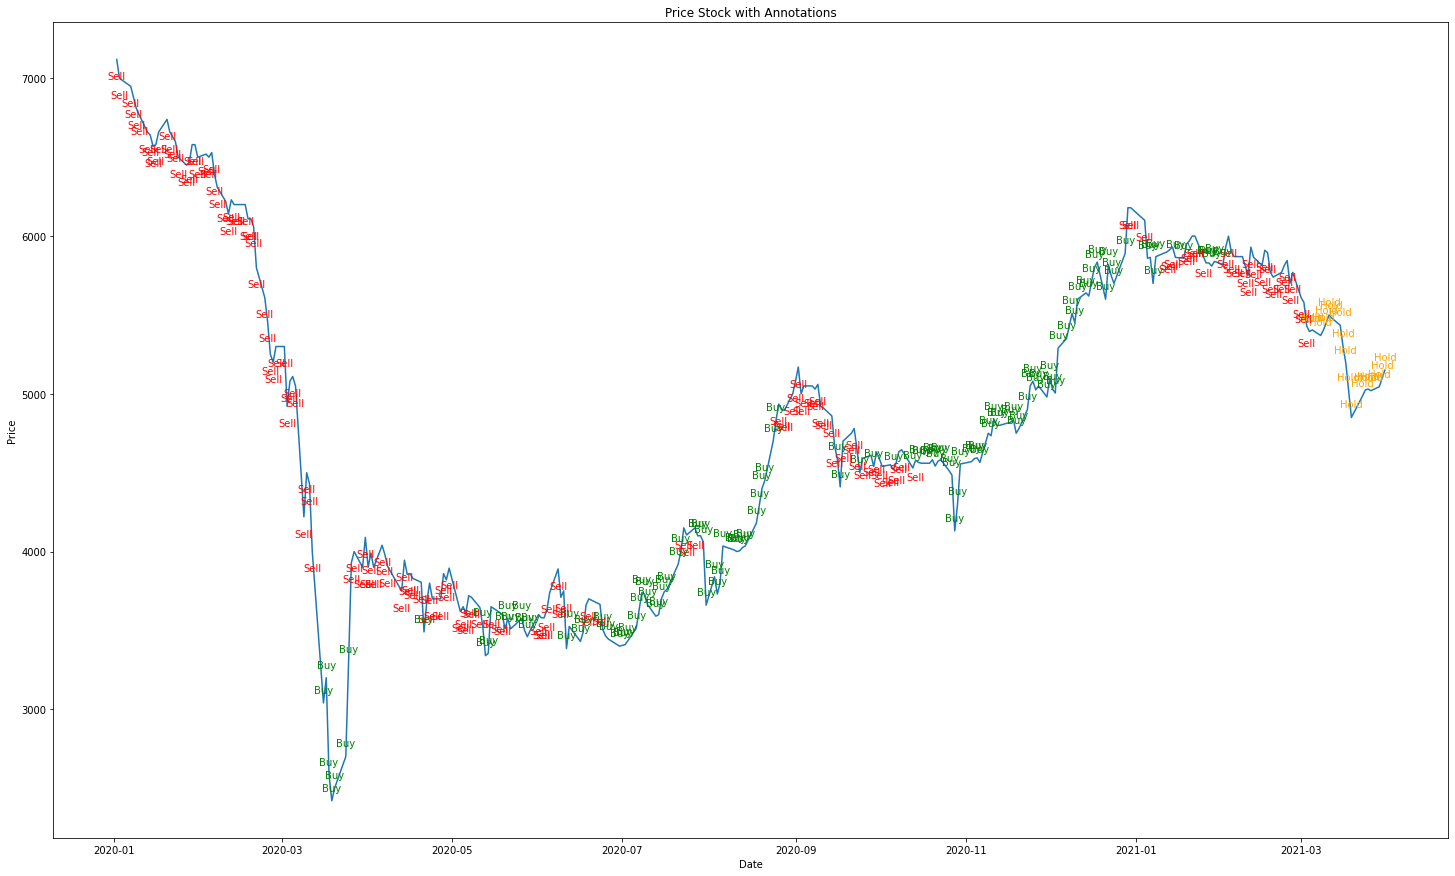

In [10]:
cbdd = cbd.reset_index().copy()
# create line chart with annotations
fig, ax = plt.subplots(figsize=(25,15))
ax.plot(cbdd['Date'], cbdd['Price'])
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Price Stock with Annotations')

# add annotations for buy, sell, or hold events
for i, row in cbdd.iterrows():
    if row['Signal'] == 'Buy':
        ax.annotate('Buy', (row['Date'], row['Price']), textcoords="offset points", xytext=(0,10), ha='center', color='green')
    elif row['Signal'] == 'Sell':
        ax.annotate('Sell', (row['Date'], row['Price']), textcoords="offset points", xytext=(0,-20), ha='center', color='red')
    else:
        ax.annotate('Hold', (row['Date'], row['Price']), textcoords="offset points", xytext=(0,10), ha='center', color = 'orange')

plt.show()

## version 2

In [ ]:
# get the average price between high and low price 
cbd['avg_price']= (cbd['High']+cbd['Low'])/2

In [ ]:
# Calculate the short-term and long-term moving averages
short_ma = cbd['avg_price'].rolling(window=7).mean() # a week 
long_ma = cbd['avg_price'].rolling(window=30).mean() # a month 

# Identify the crossover points
death_cross = (short_ma > long_ma) & (short_ma.shift() < long_ma.shift()) # golden_cross
golden_cross = (short_ma < long_ma) & (short_ma.shift() > long_ma.shift())  # death_cross

# Define the buying and selling signals
buy_signal = golden_cross
sell_signal = death_cross

# Set up the trading strategy
cbd['Position'] = None
cbd.loc[buy_signal, 'Position'] = 'Buy'
cbd.loc[sell_signal, 'Position'] = 'Sell'

# Forward-fill the positions to hold them until the next signal
cbd['Position'].fillna(method='ffill', inplace=True)

# Calculate the returns based on the positions
cbd['Returns'] = cbd['avg_price'].pct_change() * cbd['Position'].map({'Buy': 1, 'Sell': -1}).shift()

In [ ]:
short_ma[:3]

Date
2021-03-31   NaN
2021-03-30   NaN
2021-03-29   NaN
Name: avg_price, dtype: float64

In [ ]:
cbd.Position.isna().sum()

67

In [ ]:
#cbd['Position'].fillna('Hold', inplace=True)

In [ ]:
cbd.Position.value_counts()

Buy     128
Sell    108
Name: Position, dtype: int64

In [ ]:
cbd.Position.unique()

array([None, 'Buy', 'Sell'], dtype=object)

In [ ]:
cbd.duplicated().sum(), cbd.shape

(0, (303, 11))

In [ ]:
cbd.head(5)

Price    Open    High     Low  Change %    volume  MA20 Signal  \
Date                                                                          
2021-03-31  5150.0  5100.0  5170.0  5100.0    0.0098  212440.0   NaN   None   
2021-03-30  5100.0  5010.0  5100.0  5010.0    0.0109  583700.0   NaN   None   
2021-03-29  5045.0  5020.0  5045.0  5015.0    0.0050  117540.0   NaN   None   
2021-03-26  5020.0  5085.0  5085.0  4980.0   -0.0020  203460.0   NaN   None   
2021-03-25  5030.0  5035.0  5045.0  4950.0    0.0010  317060.0   NaN   None   

            avg_price Position  Returns  
Date                                     
2021-03-31     5135.0     None      NaN  
2021-03-30     5055.0     None      NaN  
2021-03-29     5030.0     None      NaN  
2021-03-26     5032.5     None      NaN  
2021-03-25     4997.5     None      NaN

In [ ]:
cbd.head(2)

Price    Open    High     Low  Change %    volume  MA20 Signal  \
Date                                                                          
2021-03-31  5150.0  5100.0  5170.0  5100.0    0.0098  212440.0   NaN   None   
2021-03-30  5100.0  5010.0  5100.0  5010.0    0.0109  583700.0   NaN   None   

            avg_price Position  Returns  
Date                                     
2021-03-31     5135.0     None      NaN  
2021-03-30     5055.0     None      NaN

Text(0.5, 0, 'Date')

Text(0, 0.5, 'avg_price')

Text(0.5, 1.0, 'avg_price Stock with Annotations')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Hold')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, 10, 'Buy')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

Text(0, -20, 'Sell')

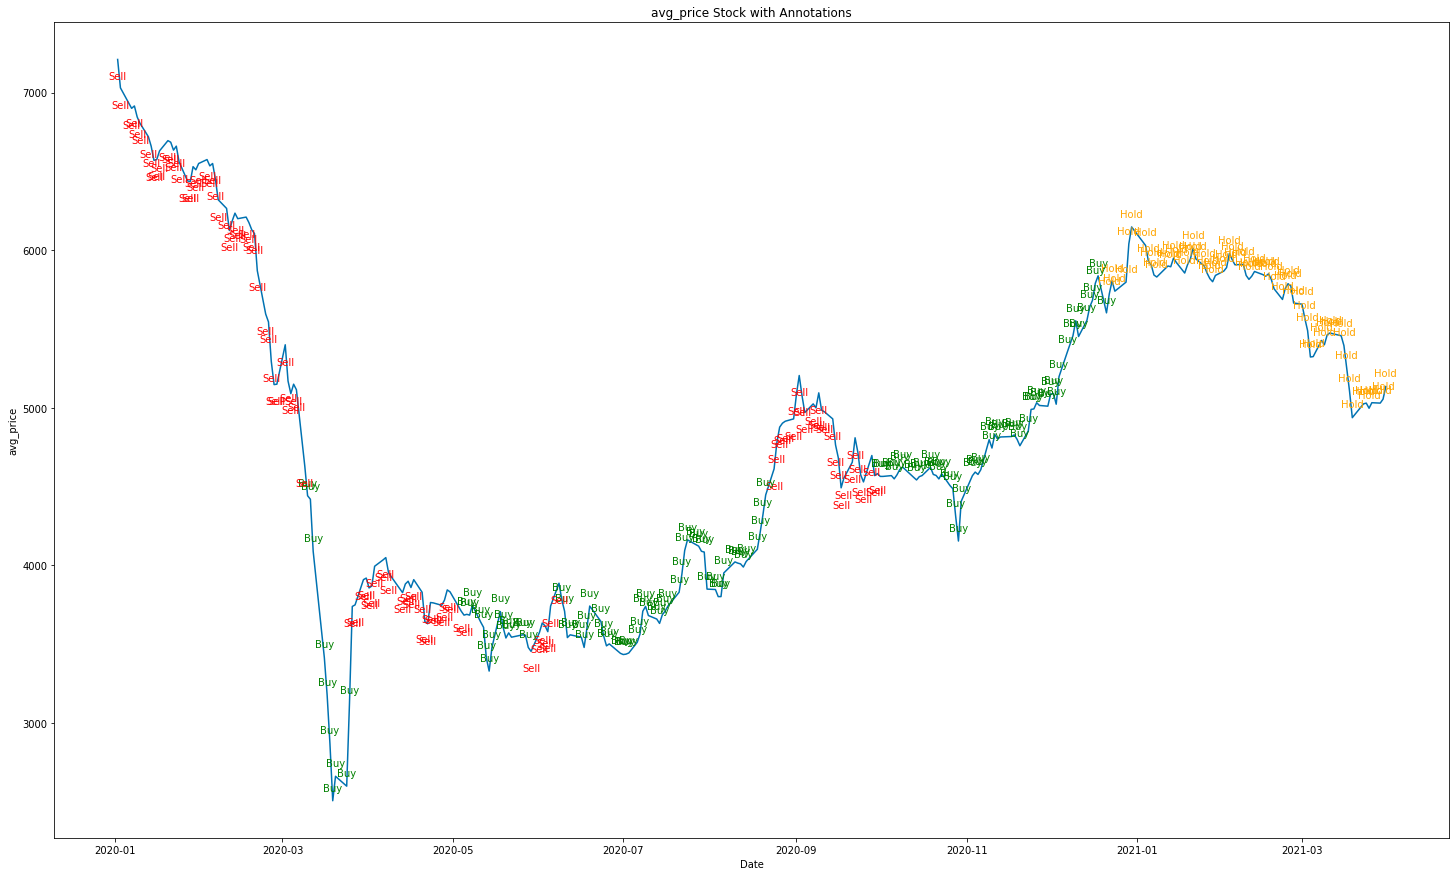

In [ ]:
cbdd = cbd.reset_index().copy()
# create line chart with annotations
fig, ax = plt.subplots(figsize=(25,15))
ax.plot(cbdd['Date'], cbdd['avg_price'])
ax.set_xlabel('Date')
ax.set_ylabel('avg_price')
ax.set_title('avg_price Stock with Annotations')

# add annotations for buy, sell, or hold events
for i, row in cbdd.iterrows():
    if row['Position'] == 'Buy':
        ax.annotate('Buy', (row['Date'], row['avg_price']), textcoords="offset points", xytext=(0,10), ha='center', color='green')
    elif row['Position'] == 'Sell':
        ax.annotate('Sell', (row['Date'], row['avg_price']), textcoords="offset points", xytext=(0,-20), ha='center', color='red')
    else:
        ax.annotate('Hold', (row['Date'], row['avg_price']), textcoords="offset points", xytext=(0,10), ha='center', color = 'orange')

plt.show()

# Bollinger Bands

Bollinger Bands are a technical analysis tool that can be used to measure the effectiveness of a trading system. They are calculated using a moving average and standard deviation, and are plotted as two lines above and below the moving average line. The upper band represents two standard deviations above the moving average, while the lower band represents two standard deviations below.

The idea behind Bollinger Bands is that they help identify periods of high volatility and low volatility in a market. When the bands are narrow, it indicates low volatility and suggests that a significant price movement may be on the horizon. Conversely, when the bands are wide, it indicates high volatility and suggests that a market trend may be losing steam.

To use Bollinger Bands to measure the effectiveness of a trading system, a trader can look at the price movements relative to the bands. If a trading system consistently generates trades that occur when the price touches or moves beyond the bands, and those trades result in profitable trades, then it may suggest that the system is effective in identifying periods of high and low volatility. Conversely, if the system generates trades that do not correspond to the bands, or if those trades consistently result in losses, then it may suggest that the system is not effective and should be reevaluated.

In summary, Bollinger Bands can be a useful tool for traders to measure the effectiveness of their trading systems by identifying periods of high and low volatility and using that information to generate profitable trades.

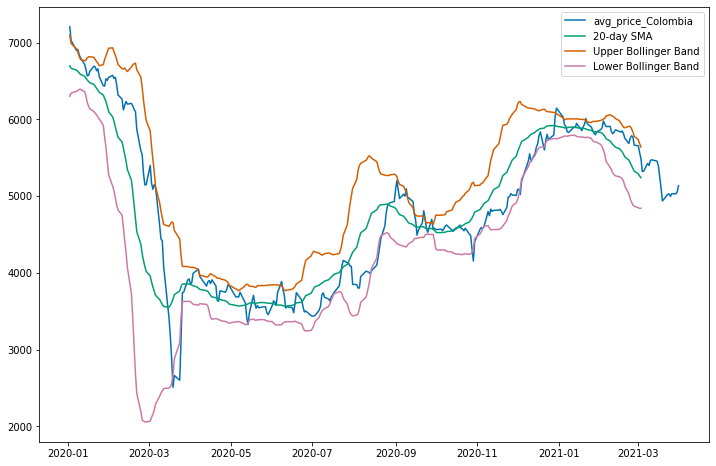

In [ ]:
# Calculate rolling mean and standard deviation
rolling_mean = cbd['avg_price'].rolling(window=20).mean()
rolling_std = cbd['avg_price'].rolling(window=20).std()

# Calculate upper and lower Bollinger Bands
upper_band = rolling_mean + 2*rolling_std
lower_band = rolling_mean - 2*rolling_std

# Plot the data and Bollinger Bands
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(cbd.index, cbd['avg_price'], label= 'avg_price_Colombia')
ax.plot(rolling_mean.index, rolling_mean, label='20-day SMA')
ax.plot(upper_band.index, upper_band, label='Upper Bollinger Band')
ax.plot(lower_band.index, lower_band, label='Lower Bollinger Band')
ax.legend(loc='upper right')
plt.show()

##  Cumulative return on $1,000 invested in Colombia stock

In [11]:
cbd.head(2)

Price    Open    High     Low  Change %    volume  MA20 Signal
Date                                                                       
2021-03-31  5150.0  5100.0  5170.0  5100.0    0.0098  212440.0   NaN   None
2021-03-30  5100.0  5010.0  5100.0  5010.0    0.0109  583700.0   NaN   None

<AxesSubplot:xlabel='Date'>

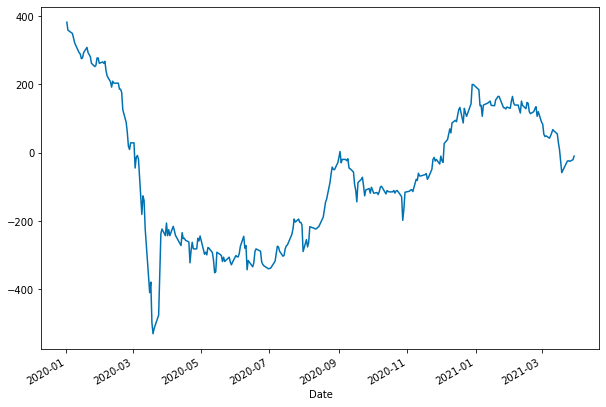

In [ ]:
# Define your investment
investment = 1000

# Calculate the daily returns here
returns = cbd.Price.pct_change()

# Calculate the cumulative returns here
returns_plus_one = returns + 1 
cumulative_return = returns_plus_one.cumprod().sub(1)

#cumulative_returns = (1 + daily_returns['Return']).cumprod() - 1

# Calculate and plot the investment return here 
cumulative_return.mul(investment).plot()
plt.show()



In [ ]:
# Create a new column indicating whether the price is above or below the 20-day moving average
#cbd['Signal'] = None
#cbd.loc[cbd['Price'] > cbd['MA20'], 'Signal'] = 'Buy' 
#cbd.loc[cbd['Price'] < cbd['MA20'], 'Signal'] = 'Sell' 
#cbd.loc[cbd['Price'] == cbd['MA20'], 'Signal'] = 'Hold'

cbd['Signal'] = None
cbd.loc[cbd['Price'] < cbd['MA20'], 'Signal'] = 'Buy' # Change <
cbd.loc[cbd['Price'] > cbd['MA20'], 'Signal'] = 'Sell' # change >
cbd.loc[cbd['Price'] == cbd['MA20'], 'Signal'] = 'Hold'

In [47]:
cbd['Signal'].fillna('Hold', inplace=True)

In [48]:
#Compute the daily returns of the stock price
cbd['Return'] = cbd['Price'].pct_change()

In [49]:
cbd.Signal.unique()

array(['Hold', 'Sell', 'Buy'], dtype=object)

In [59]:
cbd = cbd.reset_index().copy()

In [60]:
cbd.head(2)

Date   Price    Open    High     Low  Change %    volume  MA20 Signal  \
0 2021-03-31  5150.0  5100.0  5170.0  5100.0    0.0098  212440.0   NaN   Hold   
1 2021-03-30  5100.0  5010.0  5100.0  5010.0    0.0109  583700.0   NaN   Hold   

     Return  
0       NaN  
1 -0.009709

In [53]:
# Compute a 7-day moving average of the stock price
cbd['MA20'] = cbd['Price'].rolling(window=20).mean()

# Set the initial investment amount
investment = 1000
print('investe=ment is ', investment )
# Calculate the number of shares purchased on the first day
shares = investment / cbd['Price'][0]
print('shares is ', shares)
cash = investment - (shares * cbd['Price'][0])
print('cash is ', cash)

investe=ment is  1000
shares is  0.1941747572815534
cash is  0.0


In [57]:
portfolio_value = shares * cbd['Price'][0]
print('------------------------------------')
print('portfolio_value is ', portfolio_value)

------------------------------------
portfolio_value is  1000.0


In [ ]:
for idx, row in cbd.iterrows():
##  investment = 1000
  if idx == 0: 
  shares = investment / row['Price'][0]
  portfolio_value = shares * row['Price'][0]
  cash = investment - (shares * row['Price'][0])



In [ ]:
for index, row in cbd.iterrows():
  if index == 0:
    # Calculate the daily shares
    row['Shares'] = shares    
  else:
    if row['Signal'] == 'Buy':
      row[i, 'Shares'] = remaining_cash / cbd.at[i, 'Price']
#            remaining_cash = 0
        elif cbd.at[i, 'Signal'] == 'Sell':
            remaining_cash += cbd.at[i, 'Shares'] * cbd.at[i, 'Price']
#            cbd.at[i, 'Shares'] = 0
        else:
            cbd.at[i, 'Shares'] = cbd.at[i-1, 'Shares']



In [39]:
# Calculate the initial cash remaining after purchasing the shares
remaining_cash = investment - (shares * cbd['Price'][0])

In [ ]:
#Compute the daily returns of the stock price
cbd['Return'] = cbd['Price'].pct_change()

# Simulate an investment of $1000
investment = 1000
print('investe=ment is ', investment )
shares = investment / cbd['Price'][0]
print('shares is ', shares)
portfolio_value = shares * cbd['Price']
print('portfolio_value is ', portfolio_value.head(10))
cash = investment - (shares * cbd['Price'][0])
print('cash is ', cash)

# Compute the daily portfolio returns
portfolio_return = portfolio_value.pct_change()
print("portfolio_return is  ", portfolio_return.head(10))


# Print the maximum portfolio return and the corresponding date
max_return = portfolio_return.max()
print('max_return is ', max_return)
max_date = portfolio_return.idxmax()
print('max_date is ', max_date)
print(f"The maximum portfolio return of {max_return:.2%} was achieved on {max_date}.")
max_value = portfolio_value.max()
max_datee = portfolio_value.idxmax()
print(f"The maximum portfolio value of {max_value} was achieved on {max_datee}.")

investe=ment is  1000
shares is  0.1941747572815534
portfolio_value is  Date
2021-03-31    1000.000000
2021-03-30     990.291262
2021-03-29     979.611650
2021-03-26     974.757282
2021-03-25     976.699029
2021-03-24     975.728155
2021-03-23     968.349515
2021-03-19     941.747573
2021-03-18     974.757282
2021-03-17    1008.737864
Name: Price, dtype: float64
cash is  0.0
portfolio_return is   Date
2021-03-31         NaN
2021-03-30   -0.009709
2021-03-29   -0.010784
2021-03-26   -0.004955
2021-03-25    0.001992
2021-03-24   -0.000994
2021-03-23   -0.007562
2021-03-19   -0.027471
2021-03-18    0.035052
2021-03-17    0.034861
Name: Price, dtype: float64
max_return is  0.3157894736842104
max_date is  2020-03-12 00:00:00
The maximum portfolio return of 31.58% was achieved on 2020-03-12 00:00:00.
The maximum portfolio value of 1382.5242718446602 was achieved on 2020-01-02 00:00:00.


In [41]:
# Compute the daily cash, shares, and returns
cbd['Shares'] = 0
cbd['Cash'] = 0
cbd['Return'] = 0

for i in range(len(cbd)):
    # Calculate the daily shares
    if i == 0:
        cbd.at[i, 'Shares'] = shares
    else:
        if cbd.at[i, 'Signal'] == 'Buy':
            cbd.at[i, 'Shares'] = remaining_cash / cbd.at[i, 'Price']
#            remaining_cash = 0
        elif cbd.at[i, 'Signal'] == 'Sell':
            remaining_cash += cbd.at[i, 'Shares'] * cbd.at[i, 'Price']
#            cbd.at[i, 'Shares'] = 0
        else:
            cbd.at[i, 'Shares'] = cbd.at[i-1, 'Shares']
    
    # Calculate the daily cash
    cbd.at[i, 'Cash'] = remaining_cash + (cbd.at[i, 'Shares'] * cbd.at[i, 'Price'])
    
    # Calculate the daily return
#    if i == 0:
#        cbd.at[i, 'Return'] = 0
#    else:
#        cbd.at[i, 'Return'] = ((cbd.at[i, 'Cash'] - cbd.at[i-1, 'Cash']) / cbd.at[i-1, 'Cash']) * 100
        
# Print the resulting cbdframe
cbd.head(5)


Date   Price    Open    High     Low  Change %    volume  MA20 Signal  \
0 2021-03-31  5150.0  5100.0  5170.0  5100.0    0.0098  212440.0   NaN   Hold   
1 2021-03-30  5100.0  5010.0  5100.0  5010.0    0.0109  583700.0   NaN   Hold   
2 2021-03-29  5045.0  5020.0  5045.0  5015.0    0.0050  117540.0   NaN   Hold   
3 2021-03-26  5020.0  5085.0  5085.0  4980.0   -0.0020  203460.0   NaN   Hold   
4 2021-03-25  5030.0  5035.0  5045.0  4950.0    0.0010  317060.0   NaN   Hold   

    Returnn  Shares  Cash  Return  
0       NaN       0     0       0  
1 -0.009709       0     0       0  
2 -0.010784       0     0       0  
3 -0.004955       0     0       0  
4  0.001992       0     0       0

In [ ]:
for idx, row in cbd.iterrows():
  print(idx)
  print(row['Price'])
  break 


2021-03-31 00:00:00
5150.0


In [ ]:
cash = investment - (shares * cbd['Price'][70])
print('cash is ', cash)

cash is  -109.70873786407765


In [ ]:
import random

# investment period (in days)
days = 365

# amount to invest
invested_amount = 1000

# list to store daily cash
daily_cash = []

# loop through each day
for i in range(days):
    # calculate return for the day (assume it to be random)
    daily_return = random.uniform(-0.05, 0.05)
    
    # calculate cash for the day
    cash_for_day = invested_amount + (invested_amount * daily_return)
    
    # add cash to the daily cash list
    daily_cash.append(cash_for_day)
    
    # update invested amount
    invested_amount = cash_for_day

# calculate maximum return and day on which it occurred
max_return = max(daily_cash) - 1000
max_return_day = daily_cash.index(max(daily_cash)) + 1

# print results
print(f"Maximum return: {max_return:.2f}")
print(f"Day of maximum return: {max_return_day}")
print(f"Daily cash: {daily_cash}")



Maximum return: 1127.78
Day of maximum return: 346
Daily cash: [1000.9773711462636, 1043.0857676757626, 1047.0329621508033, 1073.7352940290189, 1028.789806152984, 1031.5520852771656, 1083.0238681500714, 1130.687254289859, 1119.3687484803488, 1076.1549850099436, 1069.1866602260823, 1091.2368891783572, 1099.4394563893698, 1066.236118380905, 1057.6052173596452, 1079.533471250374, 1065.3535056158657, 1060.7040916669923, 1017.0923518483694, 1041.042954543619, 1016.8720214411218, 1019.8394927553571, 1014.5697522401651, 1055.6609558861724, 1069.9741587872347, 1122.0014544438982, 1147.7960891097744, 1132.094644044184, 1111.4287458230524, 1085.4132010285603, 1099.8790897605384, 1099.4355128727684, 1141.0977326660775, 1142.1513176066035, 1185.8554979049745, 1182.284430173872, 1193.2062268904074, 1214.850831495925, 1208.4487648967747, 1211.555506775661, 1198.4084902671807, 1156.5188988320217, 1119.814770622292, 1096.5708302975324, 1085.3736722610179, 1115.5446586766707, 1104.6158783217286, 1119.5

In [ ]:
# Compute daily returns
cbd['Returns'] = cbd['Price'].pct_change()

# Set initial investment and compute daily shares
initial_investment = 1000
cbd['Shares'] = (initial_investment * (1 + cbd['Returns']).cumprod()) / cbd['Price']

# Compute daily cash and remaining cash
cbd['Daily Cash'] = cbd['Shares'] * cbd['Price']
cbd['Remaining Cash'] = initial_investment - cbd['Daily Cash'].cumsum()

In [ ]:
cbd[['Price', 'Returns', 'Shares', 'Daily Cash', 'Remaining Cash']].head(30)

Price   Returns    Shares   Daily Cash  Remaining Cash
Date                                                               
2021-03-31  5150.0       NaN       NaN          NaN             NaN
2021-03-30  5100.0 -0.009709  0.194175   990.291262        9.708738
2021-03-29  5045.0 -0.010784  0.194175   979.611650     -969.902913
2021-03-26  5020.0 -0.004955  0.194175   974.757282    -1944.660194
2021-03-25  5030.0  0.001992  0.194175   976.699029    -2921.359223
2021-03-24  5025.0 -0.000994  0.194175   975.728155    -3897.087379
2021-03-23  4987.0 -0.007562  0.194175   968.349515    -4865.436893
2021-03-19  4850.0 -0.027471  0.194175   941.747573    -5807.184466
2021-03-18  5020.0  0.035052  0.194175   974.757282    -6781.941748
2021-03-17  5195.0  0.034861  0.194175  1008.737864    -7790.679612
2021-03-16  5300.0  0.020212  0.194175  1029.126214    -8819.805825
2021-03-15  5435.0  0.025472  0.194175  1055.339806    -9875.145631
2021-03-12  5480.0  0.008280  0.194175  1064.077670   -10939.223301
2021-03-11  5500.0  0.003650  0.194175  1067.961165   -12007.184466
2021-03-10  5450.0 -0.009091  0.194175  1058.252427   -13065.436893
2021-03-09  5405.0 -0.008257  0.194175  1049.514563   -14114.951456
2021-03-08  5370.0 -0.006475  0.194175  1042.718447   -15157.669903
2021-03-05  5405.0  0.006518  0.194175  1049.514563   -16207.184466
2021-03-04  5395.0 -0.001850  0.194175  1047.572816   -17254.757282
2021-03-03  5430.0  0.006487  0.194175  1054.368932   -18309.126214
2021-03-02  5580.0  0.027624  0.194175  1083.495146   -19392.621359
2021-03-01  5610.0  0.005376  0.194175  1089.320388   -20481.941748
2021-02-26  5770.0  0.028520  0.194175  1120.388350   -21602.330097
2021-02-25  5700.0 -0.012132  0.194175  1106.796117   -22709.126214
2021-02-24  5845.0  0.025439  0.194175  1134.951456   -23844.077670
2021-02-23  5815.0 -0.005133  0.194175  1129.126214   -24973.203883
2021-02-22  5770.0 -0.007739  0.194175  1120.388350   -26093.592233
2021-02-19  5740.0 -0.005199  0.194175  1114.563107   -27208.155340
2021-02-18  5770.0  0.005226  0.194175  1120.388350   -28328.543689
2021-02-17  5895.0  0.021664  0.194175  1144.660194   -29473.203883

In [ ]:
#Compute the daily returns of the stock price
cbd['Return'] = cbd['Price'].pct_change()

# Simulate an investment of $1000
investment = 1000
print('investe=ment is ', investment )
shares = investment / cbd['Price'][0]
print('shares is ', shares)
portfolio_value = shares * cbd['Price']
print('portfolio_value is ', portfolio_value.head(10))
cash = investment - (shares * cbd['Price'][0])
print('cash is ', cash)

# Compute the daily portfolio returns
portfolio_return = portfolio_value.pct_change()
print("portfolio_return is  ", portfolio_return.head(10))


# Print the maximum portfolio return and the corresponding date
max_return = portfolio_return.max()
print('max_return is ', max_return)
max_date = portfolio_return.idxmax()
print('max_date is ', max_date)
print(f"The maximum portfolio return of {max_return:.2%} was achieved on {max_date}.")
max_value = portfolio_value.max()
max_datee = portfolio_value.idxmax()
print(f"The maximum portfolio value of {max_value} was achieved on {max_datee}.")

investe=ment is  1000
shares is  0.1941747572815534
portfolio_value is  Date
2021-03-31    1000.000000
2021-03-30     990.291262
2021-03-29     979.611650
2021-03-26     974.757282
2021-03-25     976.699029
2021-03-24     975.728155
2021-03-23     968.349515
2021-03-19     941.747573
2021-03-18     974.757282
2021-03-17    1008.737864
Name: Price, dtype: float64
cash is  0.0
portfolio_return is   Date
2021-03-31         NaN
2021-03-30   -0.009709
2021-03-29   -0.010784
2021-03-26   -0.004955
2021-03-25    0.001992
2021-03-24   -0.000994
2021-03-23   -0.007562
2021-03-19   -0.027471
2021-03-18    0.035052
2021-03-17    0.034861
Name: Price, dtype: float64
max_return is  0.3157894736842104
max_date is  2020-03-12 00:00:00
The maximum portfolio return of 31.58% was achieved on 2020-03-12 00:00:00.
The maximum portfolio value of 1382.5242718446602 was achieved on 2020-01-02 00:00:00.


In [ ]:
cbd.head()

Price    Open    High     Low  Change %    volume  MA20 Signal  \
Date                                                                          
2021-03-31  5150.0  5100.0  5170.0  5100.0    0.0098  212440.0   NaN   None   
2021-03-30  5100.0  5010.0  5100.0  5010.0    0.0109  583700.0   NaN   None   
2021-03-29  5045.0  5020.0  5045.0  5015.0    0.0050  117540.0   NaN   None   
2021-03-26  5020.0  5085.0  5085.0  4980.0   -0.0020  203460.0   NaN   None   
2021-03-25  5030.0  5035.0  5045.0  4950.0    0.0010  317060.0   NaN   None   

            avg_price Position   Returns   Returnn    Return    Shares  \
Date                                                                     
2021-03-31     5135.0     None       NaN       NaN       NaN       NaN   
2021-03-30     5055.0     None -0.009709 -0.009709 -0.009709  0.194175   
2021-03-29     5030.0     None -0.010784 -0.010784 -0.010784  0.194175   
2021-03-26     5032.5     None -0.004955 -0.004955 -0.004955  0.194175   
2021-03-25     4997.5     None  0.001992  0.001992  0.001992  0.194175   

            Daily Cash  Remaining Cash  
Date                                    
2021-03-31         NaN             NaN  
2021-03-30  990.291262        9.708738  
2021-03-29  979.611650     -969.902913  
2021-03-26  974.757282    -1944.660194  
2021-03-25  976.699029    -2921.359223

In [ ]:
#Evaluate on the basis of capital returns. Use Bollinger Bands to measure your systems effectiveness.

Data Description:
You are given a set of portfolio companies trading data from emerging markets including 2020 Q1-Q2-Q3-Q4 2021 Q1 stock prices. Each company stock is provided in different sheets. Each market's operating days varies based on the country of the company and the market the stocks are exchanged. Use only 2020 data and predict with 2021 Q1 data.

Goal(s):

Predict stock price valuations on a daily, weekly and monthly basis. Recommend BUY, HOLD, SELL decisions. Maximize capital returns, minimize losses. Ideally a loss should never happen. Minimize HOLD period.

Success Metrics:

Evaluate on the basis of capital returns. Use Bollinger Bands to measure your systems effectiveness.

#  Evaluate 

In [ ]:
#https://www.schwab.com/learn/story/3-order-types-market-limit-and-stop-orders